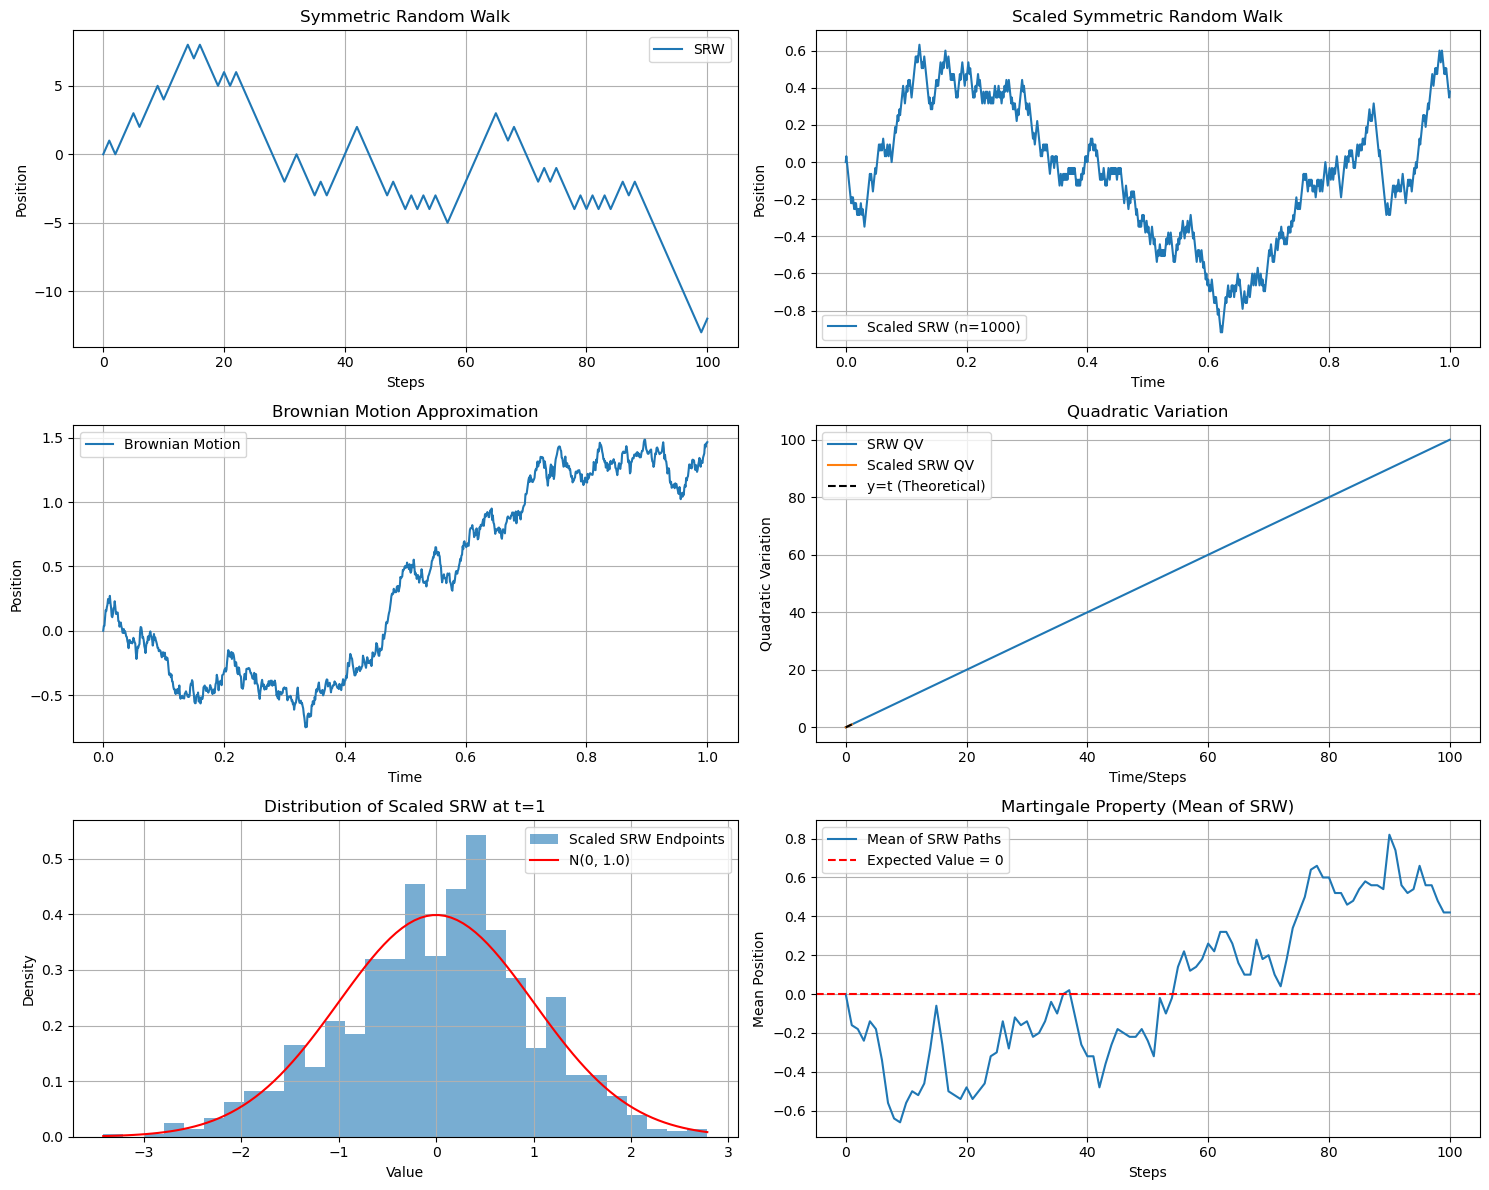

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# 1. Symmetric Random Walk (SRW)
def symmetric_random_walk(n_steps):
    steps = np.random.choice([1, -1], size=n_steps)  # Coin toss: +1 or -1
    srw = np.cumsum(np.concatenate(([0], steps)))    # Cumulative sum starting at 0
    return srw

# 2. Scaled Symmetric Random Walk
def scaled_srw(n, t_max=1.0):
    steps = np.random.choice([1, -1], size=n)  # n steps
    srw = np.cumsum(np.concatenate(([0], steps)))
    time = np.linspace(0, t_max, n + 1)       # Time points: 0 to t_max in n steps
    scaled_srw = srw / np.sqrt(n)             # Scale by 1/sqrt(n)
    return time, scaled_srw

# 3. Brownian Motion Approximation (fine time steps)
def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    increments = np.random.normal(0, np.sqrt(dt), n_steps)  # Normal increments
    bm = np.cumsum(np.concatenate(([0], increments)))
    time = np.linspace(0, t_max, n_steps + 1)
    return time, bm

# 4. Quadratic Variation
def quadratic_variation(path):
    increments = np.diff(path)  # Differences between consecutive points
    qv = np.cumsum(increments**2)  # Cumulative sum of squared increments
    return np.concatenate(([0], qv))

# 5. Simulate multiple scaled SRW paths to show distribution
def simulate_scaled_srw_endpoints(n_simulations, n_steps, t_max=1.0):
    endpoints = []
    for _ in range(n_simulations):
        _, path = scaled_srw(n_steps, t_max)
        endpoints.append(path[-1])
    return np.array(endpoints)

# Parameters
n_steps_srw = 100      # Steps for SRW
n_steps_scaled = 1000  # Steps for scaled SRW
t_max = 1.0            # Time horizon
n_simulations = 1000   # For distribution

# Generate paths
srw = symmetric_random_walk(n_steps_srw)
time_srw = np.arange(n_steps_srw + 1)
time_scaled, scaled_path = scaled_srw(n_steps_scaled, t_max)
time_bm, bm_path = brownian_motion(t_max, n_steps_scaled)

# Quadratic variations
qv_srw = quadratic_variation(srw)
qv_scaled = quadratic_variation(scaled_path)

# Distribution of scaled SRW endpoints
endpoints = simulate_scaled_srw_endpoints(n_simulations, n_steps_scaled, t_max)

# Plotting
plt.figure(figsize=(15, 12))

# Plot 1: Symmetric Random Walk
plt.subplot(3, 2, 1)
plt.plot(time_srw, srw, label='SRW')
plt.title('Symmetric Random Walk')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

# Plot 2: Scaled Symmetric Random Walk
plt.subplot(3, 2, 2)
plt.plot(time_scaled, scaled_path, label=f'Scaled SRW (n={n_steps_scaled})')
plt.title('Scaled Symmetric Random Walk')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

# Plot 3: Brownian Motion
plt.subplot(3, 2, 3)
plt.plot(time_bm, bm_path, label='Brownian Motion')
plt.title('Brownian Motion Approximation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

# Plot 4: Quadratic Variation
plt.subplot(3, 2, 4)
plt.plot(time_srw, qv_srw, label='SRW QV')
plt.plot(time_scaled, qv_scaled, label='Scaled SRW QV')
plt.plot(time_scaled, time_scaled, 'k--', label='y=t (Theoretical)')
plt.title('Quadratic Variation')
plt.xlabel('Time/Steps')
plt.ylabel('Quadratic Variation')
plt.grid(True)
plt.legend()

# Plot 5: Distribution of Scaled SRW Endpoints
plt.subplot(3, 2, 5)
plt.hist(endpoints, bins=30, density=True, alpha=0.6, label='Scaled SRW Endpoints')
x = np.linspace(min(endpoints), max(endpoints), 100)
plt.plot(x, norm.pdf(x, 0, np.sqrt(t_max)), 'r-', label=f'N(0, {t_max})')
plt.title('Distribution of Scaled SRW at t=1')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Plot 6: Martingale Property (Mean of Multiple SRW Paths)
n_paths = 100
srw_paths = np.array([symmetric_random_walk(n_steps_srw) for _ in range(n_paths)])
mean_srw = np.mean(srw_paths, axis=0)
plt.subplot(3, 2, 6)
plt.plot(time_srw, mean_srw, label='Mean of SRW Paths')
plt.axhline(0, color='r', linestyle='--', label='Expected Value = 0')
plt.title('Martingale Property (Mean of SRW)')
plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

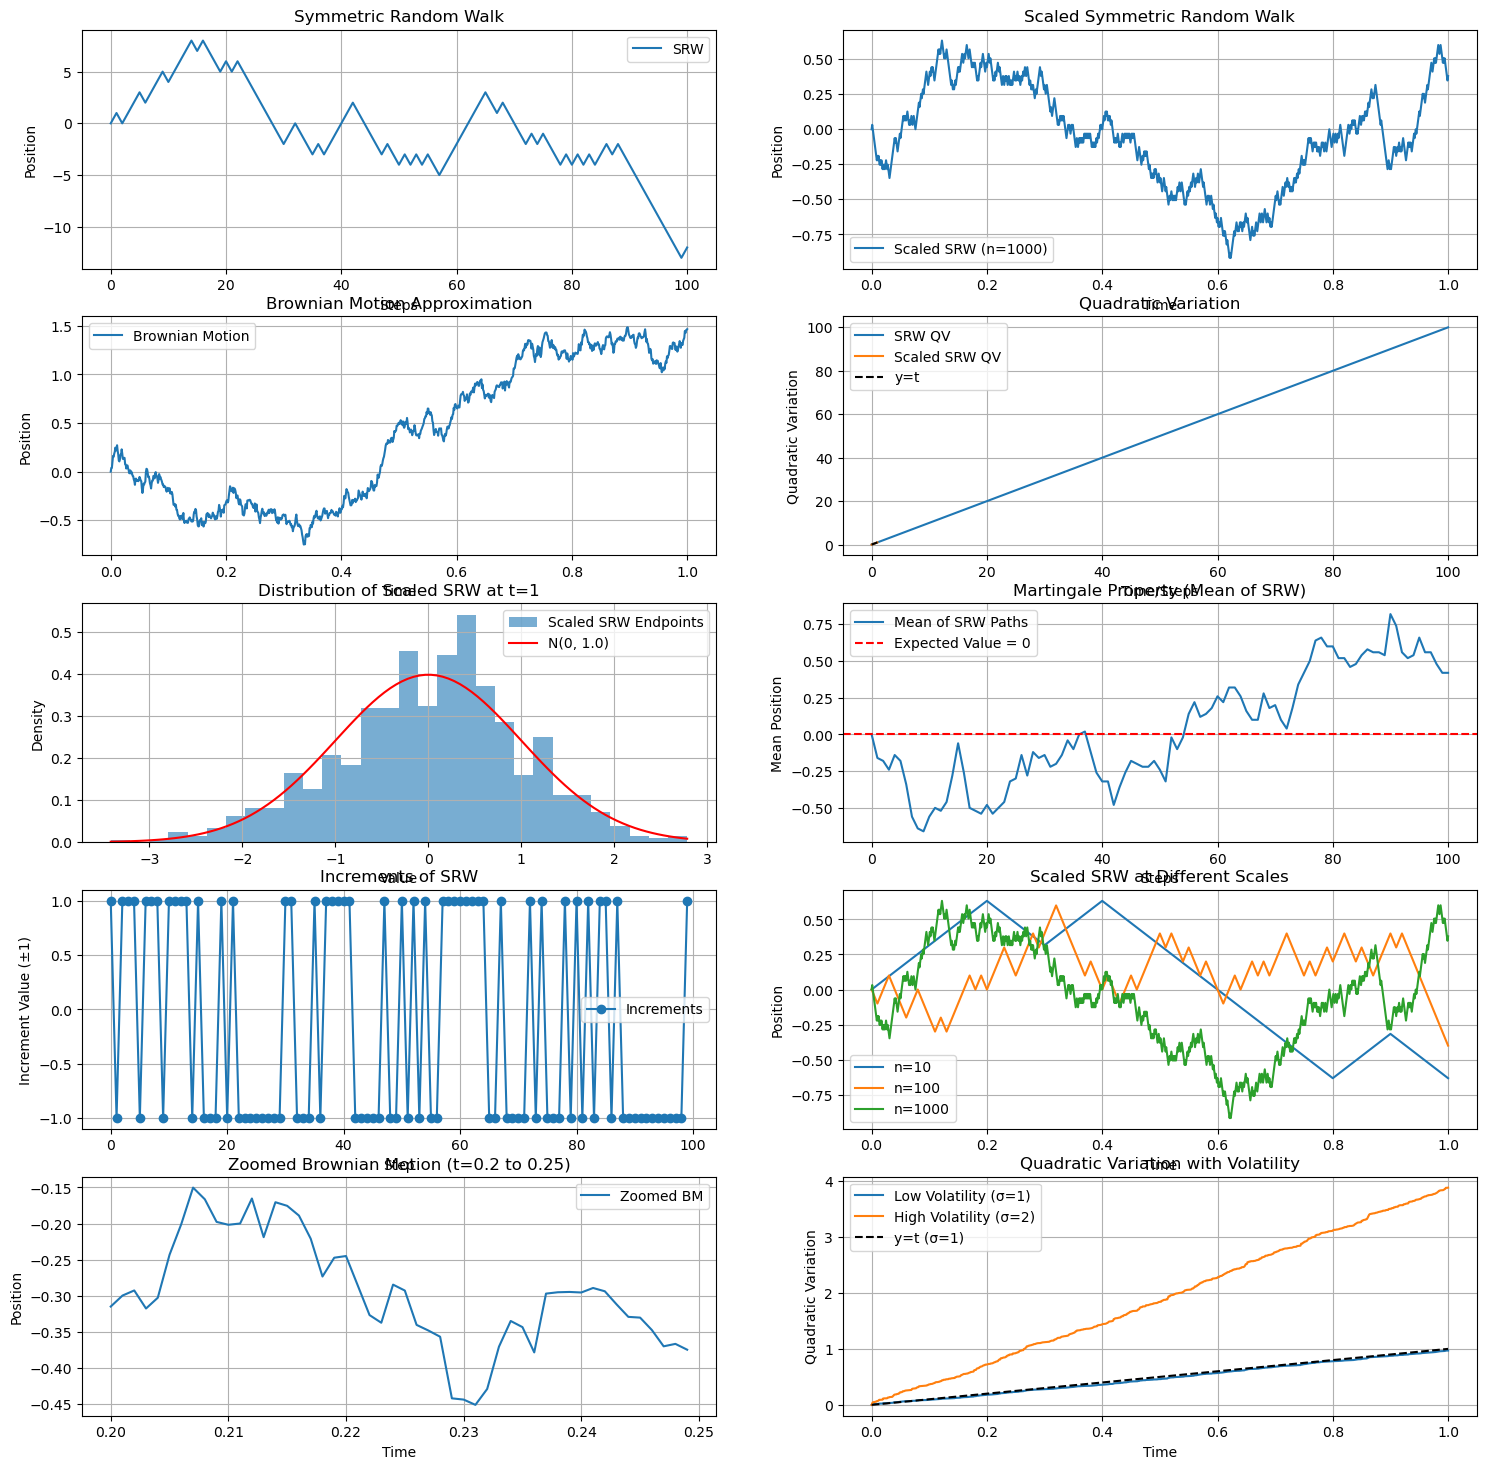

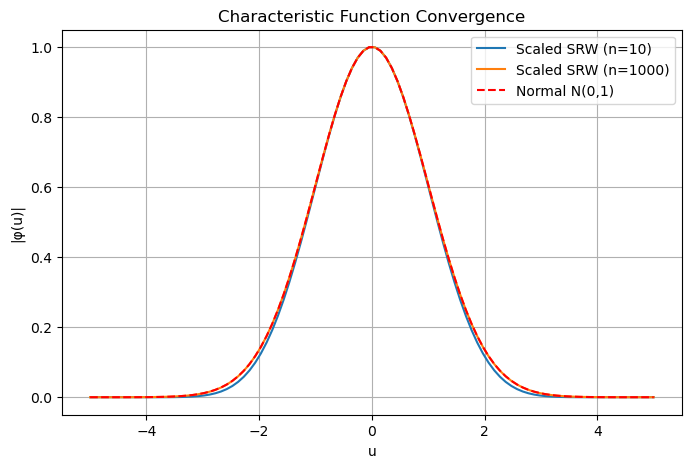

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Core Functions (unchanged from previous)
def symmetric_random_walk(n_steps):
    steps = np.random.choice([1, -1], size=n_steps)
    srw = np.cumsum(np.concatenate(([0], steps)))
    return srw

def scaled_srw(n, t_max=1.0):
    steps = np.random.choice([1, -1], size=n)
    srw = np.cumsum(np.concatenate(([0], steps)))
    time = np.linspace(0, t_max, n + 1)
    scaled_srw = srw / np.sqrt(n)
    return time, scaled_srw

def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    increments = np.random.normal(0, np.sqrt(dt), n_steps)
    bm = np.cumsum(np.concatenate(([0], increments)))
    time = np.linspace(0, t_max, n_steps + 1)
    return time, bm

def quadratic_variation(path):
    increments = np.diff(path)
    qv = np.cumsum(increments**2)
    return np.concatenate(([0], qv))

def simulate_scaled_srw_endpoints(n_simulations, n_steps, t_max=1.0):
    endpoints = []
    for _ in range(n_simulations):
        _, path = scaled_srw(n_steps, t_max)
        endpoints.append(path[-1])
    return np.array(endpoints)

# New Function: Characteristic Function
def characteristic_function_scaled_srw(u, n, t=1.0):
    # For X_j = ±1, scaled by 1/sqrt(n), over nt steps
    single_step = 0.5 * np.exp(1j * u / np.sqrt(n)) + 0.5 * np.exp(-1j * u / np.sqrt(n))
    return np.abs(single_step)**(n * t)  # Magnitude of (cos(u/sqrt(n)))^(nt)

def characteristic_function_normal(u, t=1.0):
    return np.exp(-0.5 * u**2 * t)  # Magnitude of e^(-u^2 t / 2)

# Parameters
n_steps_srw = 100
n_steps_scaled = 1000
t_max = 1.0
n_simulations = 1000

# Generate paths
srw = symmetric_random_walk(n_steps_srw)
time_srw = np.arange(n_steps_srw + 1)
time_scaled, scaled_path = scaled_srw(n_steps_scaled, t_max)
time_bm, bm_path = brownian_motion(t_max, n_steps_scaled)
qv_srw = quadratic_variation(srw)
qv_scaled = quadratic_variation(scaled_path)
endpoints = simulate_scaled_srw_endpoints(n_simulations, n_steps_scaled, t_max)
srw_paths = np.array([symmetric_random_walk(n_steps_srw) for _ in range(100)])
mean_srw = np.mean(srw_paths, axis=0)

# New Data
# Increments of SRW
increments_srw = np.diff(srw)
# Scaled SRW at different n
time_n10, scaled_n10 = scaled_srw(10, t_max)
time_n100, scaled_n100 = scaled_srw(100, t_max)
# Zoomed Brownian Motion
zoom_start, zoom_end = int(n_steps_scaled * 0.2), int(n_steps_scaled * 0.25)
time_zoom = time_bm[zoom_start:zoom_end]
bm_zoom = bm_path[zoom_start:zoom_end]
# Volatile Process (GBM-like with varying sigma)
dt = t_max / n_steps_scaled
time_vol, vol_path = brownian_motion(t_max, n_steps_scaled)  # Base BM
vol_path_high = vol_path * 2  # Higher volatility (sigma = 2)
qv_vol = quadratic_variation(vol_path)
qv_vol_high = quadratic_variation(vol_path_high)
# Characteristic Functions
u_values = np.linspace(-5, 5, 100)
cf_n10 = characteristic_function_scaled_srw(u_values, 10)
cf_n1000 = characteristic_function_scaled_srw(u_values, 1000)
cf_normal = characteristic_function_normal(u_values)

# Plotting
plt.figure(figsize=(18, 18))

# Existing Plots
plt.subplot(5, 2, 1)
plt.plot(time_srw, srw, label='SRW')
plt.title('Symmetric Random Walk')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

plt.subplot(5, 2, 2)
plt.plot(time_scaled, scaled_path, label=f'Scaled SRW (n={n_steps_scaled})')
plt.title('Scaled Symmetric Random Walk')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

plt.subplot(5, 2, 3)
plt.plot(time_bm, bm_path, label='Brownian Motion')
plt.title('Brownian Motion Approximation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

plt.subplot(5, 2, 4)
plt.plot(time_srw, qv_srw, label='SRW QV')
plt.plot(time_scaled, qv_scaled, label='Scaled SRW QV')
plt.plot(time_scaled, time_scaled, 'k--', label='y=t')
plt.title('Quadratic Variation')
plt.xlabel('Time/Steps')
plt.ylabel('Quadratic Variation')
plt.grid(True)
plt.legend()

plt.subplot(5, 2, 5)
plt.hist(endpoints, bins=30, density=True, alpha=0.6, label='Scaled SRW Endpoints')
x = np.linspace(min(endpoints), max(endpoints), 100)
plt.plot(x, norm.pdf(x, 0, np.sqrt(t_max)), 'r-', label=f'N(0, {t_max})')
plt.title('Distribution of Scaled SRW at t=1')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

plt.subplot(5, 2, 6)
plt.plot(time_srw, mean_srw, label='Mean of SRW Paths')
plt.axhline(0, color='r', linestyle='--', label='Expected Value = 0')
plt.title('Martingale Property (Mean of SRW)')
plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.grid(True)
plt.legend()

# New Plots
# 1. Increments of SRW
plt.subplot(5, 2, 7)
plt.plot(range(n_steps_srw), increments_srw, 'o-', label='Increments')
plt.title('Increments of SRW')
plt.xlabel('Step')
plt.ylabel('Increment Value (±1)')
plt.grid(True)
plt.legend()

# 2. Scaled SRW at Different Scales
plt.subplot(5, 2, 8)
plt.plot(time_n10, scaled_n10, label='n=10')
plt.plot(time_n100, scaled_n100, label='n=100')
plt.plot(time_scaled, scaled_path, label=f'n={n_steps_scaled}')
plt.title('Scaled SRW at Different Scales')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

# 3. Zoomed Brownian Motion
plt.subplot(5, 2, 9)
plt.plot(time_zoom, bm_zoom, label='Zoomed BM')
plt.title('Zoomed Brownian Motion (t=0.2 to 0.25)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()

# 4. Volatility Effect on Quadratic Variation
plt.subplot(5, 2, 10)
plt.plot(time_vol, qv_vol, label='Low Volatility (σ=1)')
plt.plot(time_vol, qv_vol_high, label='High Volatility (σ=2)')
plt.plot(time_vol, time_vol, 'k--', label='y=t (σ=1)')
plt.title('Quadratic Variation with Volatility')
plt.xlabel('Time')
plt.ylabel('Quadratic Variation')
plt.grid(True)
plt.legend()

# Bonus Plot: Characteristic Function (separate figure)
plt.figure(figsize=(8, 5))
plt.plot(u_values, cf_n10, label='Scaled SRW (n=10)')
plt.plot(u_values, cf_n1000, label='Scaled SRW (n=1000)')
plt.plot(u_values, cf_normal, 'r--', label='Normal N(0,1)')
plt.title('Characteristic Function Convergence')
plt.xlabel('u')
plt.ylabel('|φ(u)|')
plt.grid(True)
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

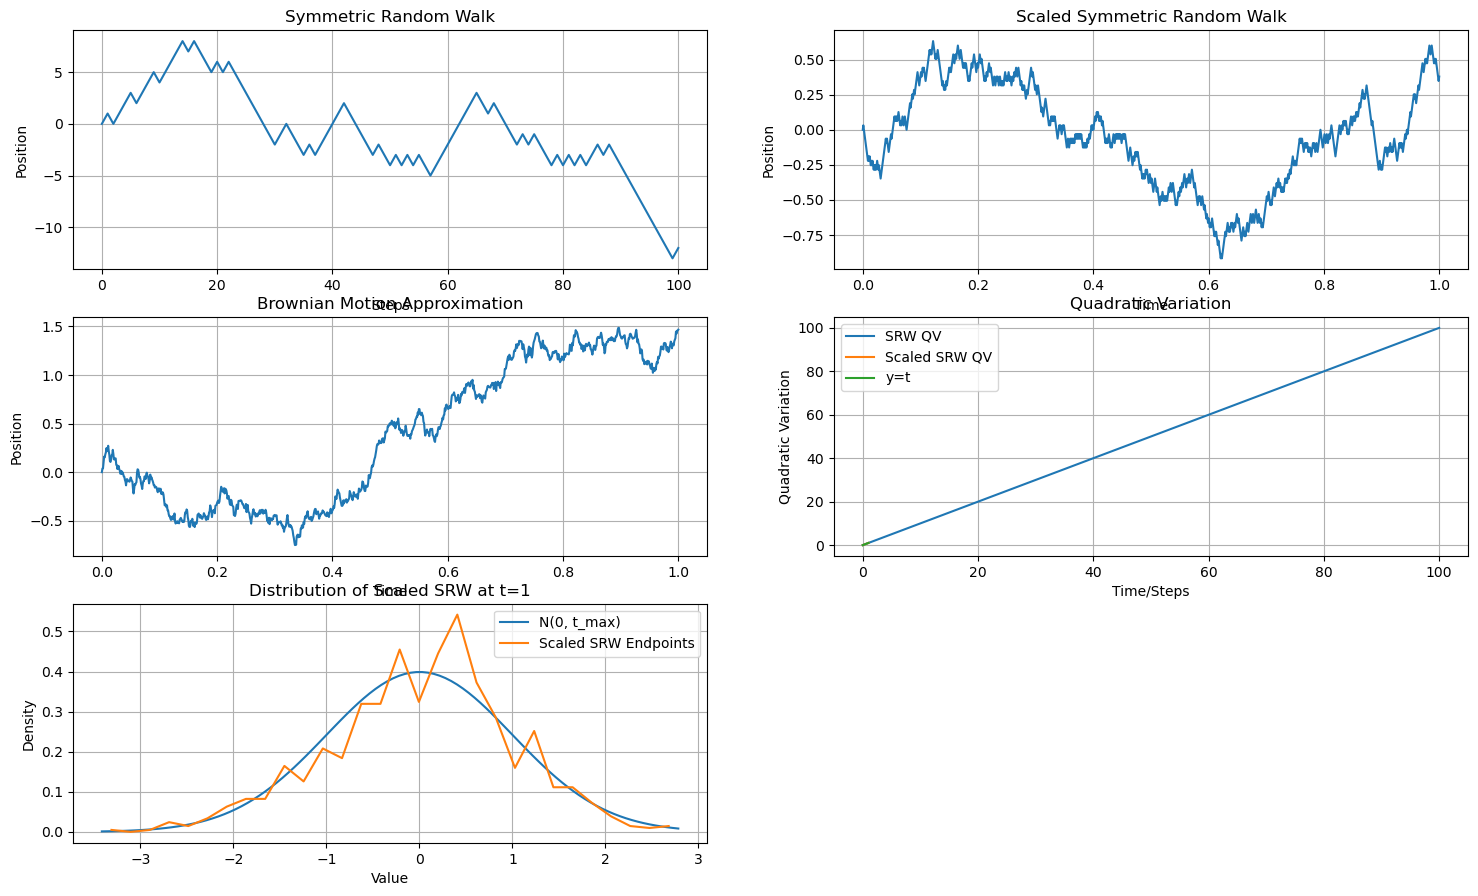

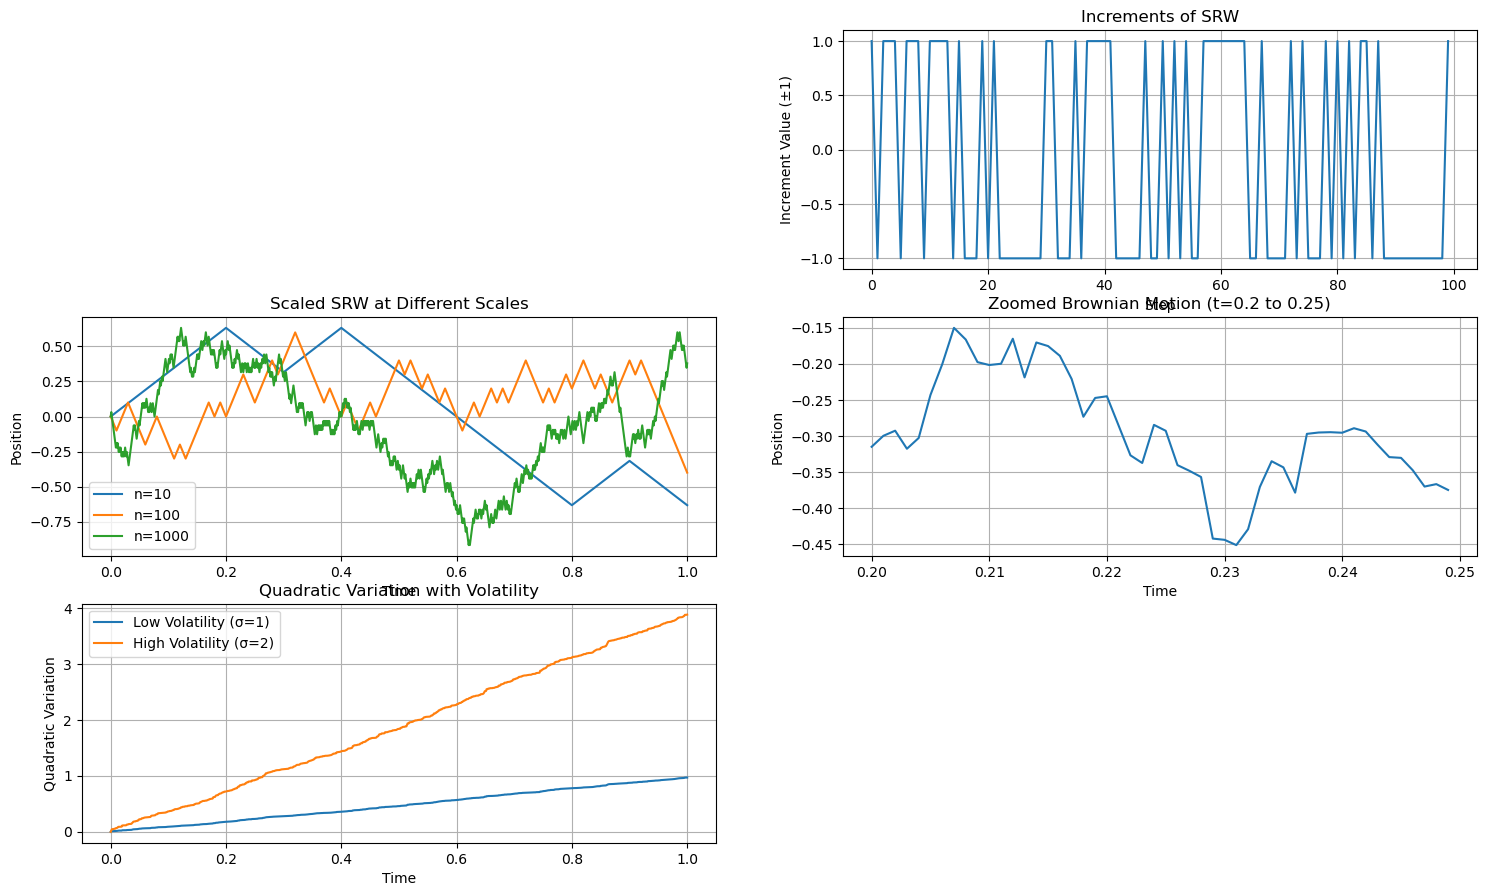

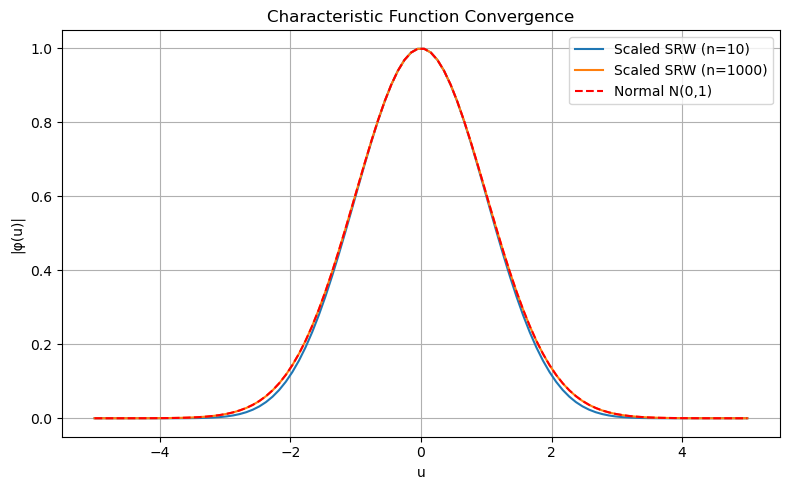

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Core Functions (unchanged from previous)
def symmetric_random_walk(n_steps):
    steps = np.random.choice([1, -1], size=n_steps)
    srw = np.cumsum(np.concatenate(([0], steps)))
    return srw

def scaled_srw(n, t_max=1.0):
    steps = np.random.choice([1, -1], size=n)
    srw = np.cumsum(np.concatenate(([0], steps)))
    time = np.linspace(0, t_max, n + 1)
    scaled_srw = srw / np.sqrt(n)
    return time, scaled_srw

def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    increments = np.random.normal(0, np.sqrt(dt), n_steps)
    bm = np.cumsum(np.concatenate(([0], increments)))
    time = np.linspace(0, t_max, n_steps + 1)
    return time, bm

def quadratic_variation(path):
    increments = np.diff(path)
    qv = np.cumsum(increments**2)
    return np.concatenate(([0], qv))

def simulate_scaled_srw_endpoints(n_simulations, n_steps, t_max=1.0):
    endpoints = []
    for _ in range(n_simulations):
        _, path = scaled_srw(n_steps, t_max)
        endpoints.append(path[-1])
    return np.array(endpoints)

# Parameters
n_steps_srw = 100
n_steps_scaled = 1000
t_max = 1.0
n_simulations = 1000

# Generate paths
srw = symmetric_random_walk(n_steps_srw)
time_srw = np.arange(n_steps_srw + 1)
time_scaled, scaled_path = scaled_srw(n_steps_scaled, t_max)
time_bm, bm_path = brownian_motion(t_max, n_steps_scaled)
qv_srw = quadratic_variation(srw)
qv_scaled = quadratic_variation(scaled_path)
endpoints = simulate_scaled_srw_endpoints(n_simulations, n_steps_scaled, t_max)
srw_paths = np.array([symmetric_random_walk(n_steps_srw) for _ in range(100)])
mean_srw = np.mean(srw_paths, axis=0)

# New Data
increments_srw = np.diff(srw)
time_n10, scaled_n10 = scaled_srw(10, t_max)
time_n100, scaled_n100 = scaled_srw(100, t_max)
zoom_start, zoom_end = int(n_steps_scaled * 0.2), int(n_steps_scaled * 0.25)
time_zoom = time_bm[zoom_start:zoom_end]
bm_zoom = bm_path[zoom_start:zoom_end]
dt = t_max / n_steps_scaled
time_vol, vol_path = brownian_motion(t_max, n_steps_scaled)
vol_path_high = vol_path * 2
qv_vol = quadratic_variation(vol_path)
qv_vol_high = quadratic_variation(vol_path_high)
u_values = np.linspace(-5, 5, 100)
cf_n10 = characteristic_function_scaled_srw(u_values, 10)
cf_n1000 = characteristic_function_scaled_srw(u_values, 1000)
cf_normal = characteristic_function_normal(u_values)

# Plotting Function
def plot_subplots(subplot_pos, data, title, xlabel, ylabel, legend_labels=None):
    plt.subplot(5, 2, subplot_pos)  # Adjusted for 5x2 grid layout
    for i, (x, y) in enumerate(data):
        label = legend_labels[i] if legend_labels else None
        plt.plot(x, y, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend_labels:
        plt.legend()
    plt.grid(True)

# Create the plots
plt.figure(figsize=(18, 18))

# Existing Plots
plot_subplots(1, [(time_srw, srw)], 'Symmetric Random Walk', 'Steps', 'Position')
plot_subplots(2, [(time_scaled, scaled_path)], 'Scaled Symmetric Random Walk', 'Time', 'Position')
plot_subplots(3, [(time_bm, bm_path)], 'Brownian Motion Approximation', 'Time', 'Position')
plot_subplots(4, [(time_srw, qv_srw), (time_scaled, qv_scaled), (time_scaled, time_scaled)], 
              'Quadratic Variation', 'Time/Steps', 'Quadratic Variation', legend_labels=['SRW QV', 'Scaled SRW QV', 'y=t'])

# Corrected Plot for Distribution of Scaled SRW Endpoints
# Fixing the mismatched dimensions issue
hist_bins = 30
hist_counts, hist_edges = np.histogram(endpoints, bins=hist_bins, density=True)
bin_centers = 0.5 * (hist_edges[1:] + hist_edges[:-1])  # Get bin centers for correct x-values

plot_subplots(5, [
    (np.linspace(min(endpoints), max(endpoints), 100), norm.pdf(np.linspace(min(endpoints), max(endpoints), 100), 0, np.sqrt(t_max))),  # Normal Distribution
    (bin_centers, hist_counts)  # Histogram with correct x-values
], 'Distribution of Scaled SRW at t=1', 'Value', 'Density', legend_labels=['N(0, t_max)', 'Scaled SRW Endpoints'])

# New Plots
plt.figure(figsize=(18, 18))  # New figure for the new plots
plot_subplots(6, [(range(n_steps_srw), increments_srw)], 'Increments of SRW', 'Step', 'Increment Value (±1)')
plot_subplots(7, [(time_n10, scaled_n10), (time_n100, scaled_n100), (time_scaled, scaled_path)], 
              'Scaled SRW at Different Scales', 'Time', 'Position', legend_labels=['n=10', 'n=100', f'n={n_steps_scaled}'])
plot_subplots(8, [(time_zoom, bm_zoom)], 'Zoomed Brownian Motion (t=0.2 to 0.25)', 'Time', 'Position')
plot_subplots(9, [(time_vol, qv_vol), (time_vol, qv_vol_high)], 'Quadratic Variation with Volatility', 'Time', 'Quadratic Variation', legend_labels=['Low Volatility (σ=1)', 'High Volatility (σ=2)'])

# Bonus Plot: Characteristic Function (separate figure)
plt.figure(figsize=(8, 5))
plt.plot(u_values, cf_n10, label='Scaled SRW (n=10)')
plt.plot(u_values, cf_n1000, label='Scaled SRW (n=1000)')
plt.plot(u_values, cf_normal, 'r--', label='Normal N(0,1)')
plt.title('Characteristic Function Convergence')
plt.xlabel('u')
plt.ylabel('|φ(u)|')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# 1. Multiple SRW Paths to Show Variability
def plot_multiple_srw_paths(n_steps=100, n_paths=5):
    plt.figure(figsize=(10, 6))
    for _ in range(n_paths):
        steps = np.random.choice([1, -1], size=n_steps)  # Coin toss: +1 or -1
        path = np.cumsum(steps)  # Cumulative sum for SRW
        path = np.insert(path, 0, 0)  # Start at 0
        plt.plot(range(n_steps + 1), path, alpha=0.6, label='SRW Path' if _ == 0 else None)
    plt.title("Multiple Symmetric Random Walk Paths")
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.grid(True)
    plt.legend()
    plt.savefig("multiple_srw_paths.png")
    plt.close()

# 2. SRW Variance Growth Over Time
def plot_srw_variance(n_steps=100, n_simulations=1000):
    positions = []
    for _ in range(n_simulations):
        steps = np.random.choice([1, -1], size=n_steps)
        path = np.cumsum(steps)
        positions.append(path)
    positions = np.array(positions)
    variances = np.var(positions, axis=0)
    steps = range(1, n_steps + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(steps, variances, label="Empirical Variance", color="blue")
    plt.plot(steps, steps, '--', label="Theoretical Variance (t)", color="orange")
    plt.title("Variance Growth of Symmetric Random Walk")
    plt.xlabel("Steps")
    plt.ylabel("Variance")
    plt.grid(True)
    plt.legend()
    plt.savefig("srw_variance_growth.png")
    plt.close()

# 3. Comparing SRW and Scaled SRW Paths Side by Side
def plot_srw_vs_scaled_srw(n_steps=1000, n=1000):
    # SRW
    steps_srw = np.random.choice([1, -1], size=n_steps)
    srw_path = np.cumsum(steps_srw)
    srw_path = np.insert(srw_path, 0, 0)
    
    # Scaled SRW
    steps_scaled = steps_srw / np.sqrt(n)
    scaled_path = np.cumsum(steps_scaled)
    scaled_path = np.insert(scaled_path, 0, 0)
    time = np.linspace(0, 1, n_steps + 1)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(n_steps + 1), srw_path, color="blue")
    plt.title("Symmetric Random Walk")
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(time, scaled_path, color="green")
    plt.title("Scaled SRW (n=1000)")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig("srw_vs_scaled_srw.png")
    plt.close()

# 4. Increments of SRW to Show Independence
def plot_srw_increments(n_steps=100):
    steps = np.random.choice([1, -1], size=n_steps)
    path = np.cumsum(steps)
    increments = np.diff(path)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_steps), increments, 'o-', color="purple", alpha=0.6)
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Increments of Symmetric Random Walk")
    plt.xlabel("Step")
    plt.ylabel("Increment")
    plt.grid(True)
    plt.savefig("srw_increments.png")
    plt.close()

# 5. Convergence of Scaled SRW to Normal Distribution (Animation-like Snapshots)
def plot_scaled_srw_distributions(n_steps=1000, scales=[10, 100, 1000]):
    plt.figure(figsize=(12, 4))
    for i, n in enumerate(scales, 1):
        positions = []
        for _ in range(1000):
            steps = np.random.choice([1, -1], size=n_steps)
            scaled_position = np.sum(steps) / np.sqrt(n)
            positions.append(scaled_position)
        plt.subplot(1, 3, i)
        plt.hist(positions, bins=30, density=True, alpha=0.7, color="teal")
        x = np.linspace(-3, 3, 100)
        plt.plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2/2), 'r-', label="N(0,1)")
        plt.title(f"Scaled SRW (n={n})")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.savefig("scaled_srw_distributions.png")
    plt.close()

# Generate all plots
plot_multiple_srw_paths()
plot_srw_variance()
plot_srw_vs_scaled_srw()
plot_srw_increments()
plot_scaled_srw_distributions()

In [6]:
plot_multiple_srw_paths()
plot_srw_variance()
plot_srw_vs_scaled_srw()
plot_srw_increments()
plot_scaled_srw_distributions()

Current working directory: C:\Users\LENOVO
Generating plots...
Saved plot to: C:\Users\LENOVO\multiple_srw_paths.png


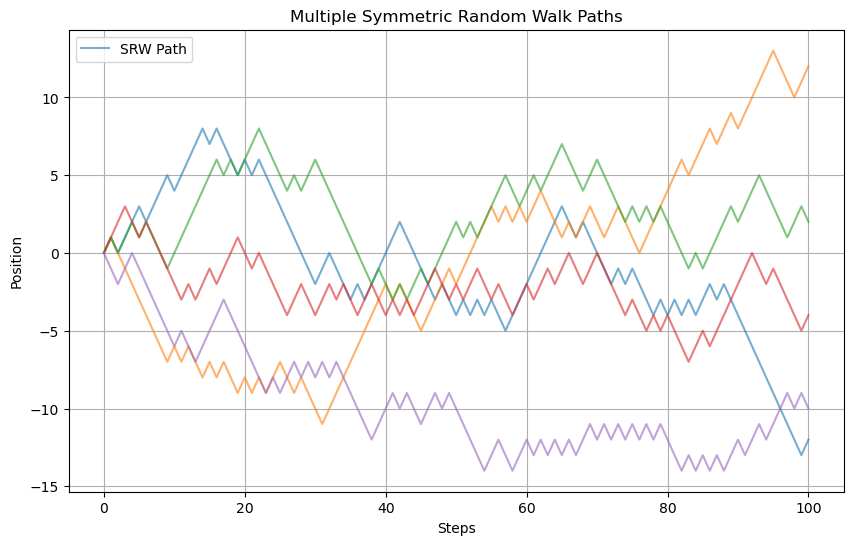

Saved plot to: C:\Users\LENOVO\srw_variance_growth.png


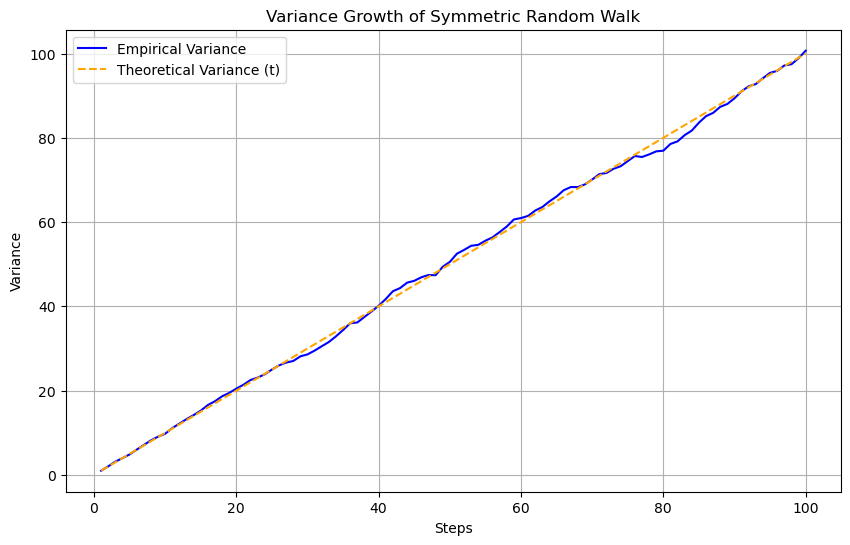

Saved plot to: C:\Users\LENOVO\srw_vs_scaled_srw.png


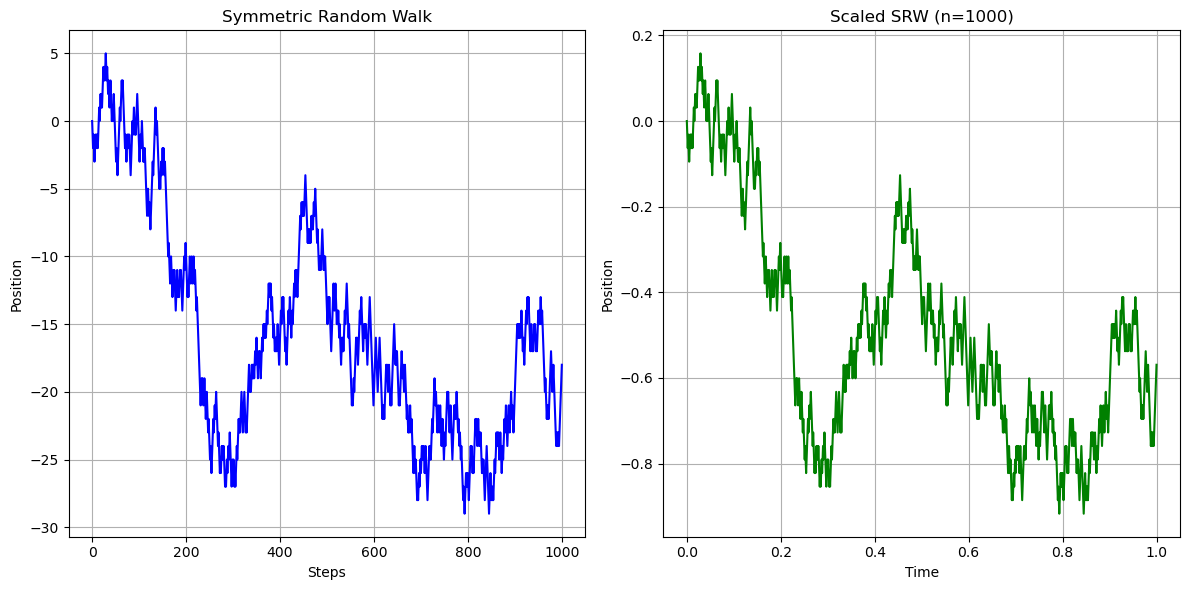

Saved plot to: C:\Users\LENOVO\srw_increments.png


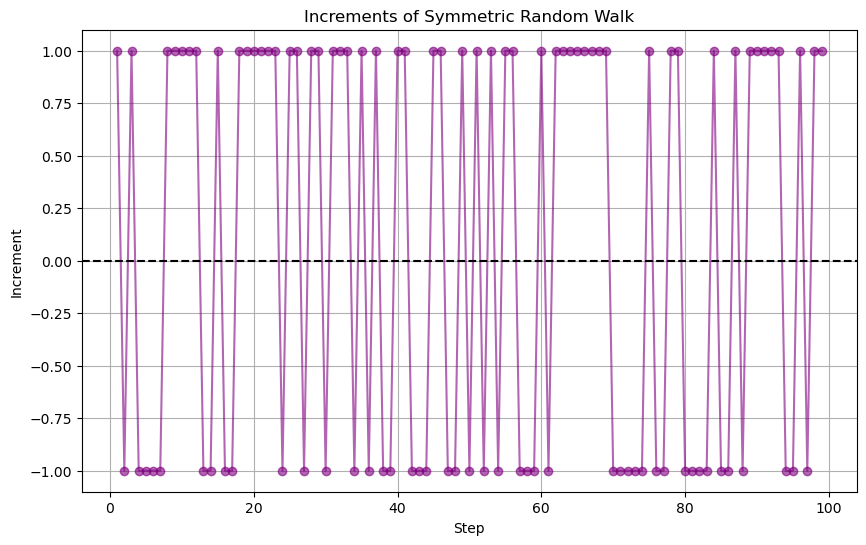

Saved plot to: C:\Users\LENOVO\scaled_srw_distributions.png


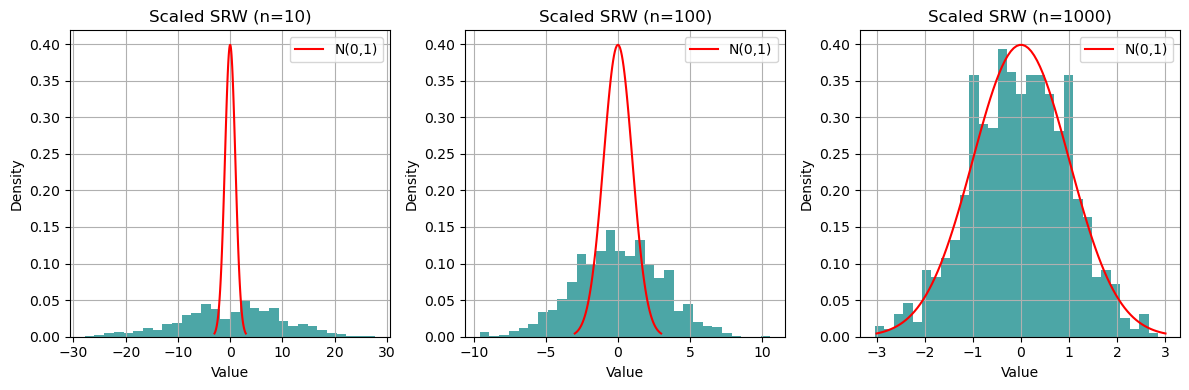

All plots generated successfully!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Specify a directory to save the plots (modify this path as needed)
save_dir = current_dir  # You can change this to something like "/path/to/your/directory"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 1. Multiple SRW Paths to Show Variability
def plot_multiple_srw_paths(n_steps=100, n_paths=5):
    plt.figure(figsize=(10, 6))
    for _ in range(n_paths):
        steps = np.random.choice([1, -1], size=n_steps)  # Coin toss: +1 or -1
        path = np.cumsum(steps)  # Cumulative sum for SRW
        path = np.insert(path, 0, 0)  # Start at 0
        plt.plot(range(n_steps + 1), path, alpha=0.6, label='SRW Path' if _ == 0 else None)
    plt.title("Multiple Symmetric Random Walk Paths")
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.grid(True)
    plt.legend()
    file_path = os.path.join(save_dir, "multiple_srw_paths.png")
    plt.savefig(file_path)
    print(f"Saved plot to: {file_path}")
    plt.show()  # Display inline for Jupyter
    plt.close()

# 2. SRW Variance Growth Over Time
def plot_srw_variance(n_steps=100, n_simulations=1000):
    positions = []
    for _ in range(n_simulations):
        steps = np.random.choice([1, -1], size=n_steps)
        path = np.cumsum(steps)
        positions.append(path)
    positions = np.array(positions)
    variances = np.var(positions, axis=0)
    steps = range(1, n_steps + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(steps, variances, label="Empirical Variance", color="blue")
    plt.plot(steps, steps, '--', label="Theoretical Variance (t)", color="orange")
    plt.title("Variance Growth of Symmetric Random Walk")
    plt.xlabel("Steps")
    plt.ylabel("Variance")
    plt.grid(True)
    plt.legend()
    file_path = os.path.join(save_dir, "srw_variance_growth.png")
    plt.savefig(file_path)
    print(f"Saved plot to: {file_path}")
    plt.show()
    plt.close()

# 3. Comparing SRW and Scaled SRW Paths Side by Side
def plot_srw_vs_scaled_srw(n_steps=1000, n=1000):
    # SRW
    steps_srw = np.random.choice([1, -1], size=n_steps)
    srw_path = np.cumsum(steps_srw)
    srw_path = np.insert(srw_path, 0, 0)
    
    # Scaled SRW
    steps_scaled = steps_srw / np.sqrt(n)
    scaled_path = np.cumsum(steps_scaled)
    scaled_path = np.insert(scaled_path, 0, 0)
    time = np.linspace(0, 1, n_steps + 1)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(n_steps + 1), srw_path, color="blue")
    plt.title("Symmetric Random Walk")
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(time, scaled_path, color="green")
    plt.title("Scaled SRW (n=1000)")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.grid(True)
    
    plt.tight_layout()
    file_path = os.path.join(save_dir, "srw_vs_scaled_srw.png")
    plt.savefig(file_path)
    print(f"Saved plot to: {file_path}")
    plt.show()
    plt.close()

# 4. Increments of SRW to Show Independence
def plot_srw_increments(n_steps=100):
    steps = np.random.choice([1, -1], size=n_steps)
    path = np.cumsum(steps)
    increments = np.diff(path)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_steps), increments, 'o-', color="purple", alpha=0.6)
    plt.axhline(0, color="black", linestyle="--")
    plt.title("Increments of Symmetric Random Walk")
    plt.xlabel("Step")
    plt.ylabel("Increment")
    plt.grid(True)
    file_path = os.path.join(save_dir, "srw_increments.png")
    plt.savefig(file_path)
    print(f"Saved plot to: {file_path}")
    plt.show()
    plt.close()

# 5. Convergence of Scaled SRW to Normal Distribution (Animation-like Snapshots)
def plot_scaled_srw_distributions(n_steps=1000, scales=[10, 100, 1000]):
    plt.figure(figsize=(12, 4))
    for i, n in enumerate(scales, 1):
        positions = []
        for _ in range(1000):
            steps = np.random.choice([1, -1], size=n_steps)
            scaled_position = np.sum(steps) / np.sqrt(n)
            positions.append(scaled_position)
        plt.subplot(1, 3, i)
        plt.hist(positions, bins=30, density=True, alpha=0.7, color="teal")
        x = np.linspace(-3, 3, 100)
        plt.plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2/2), 'r-', label="N(0,1)")
        plt.title(f"Scaled SRW (n={n})")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    file_path = os.path.join(save_dir, "scaled_srw_distributions.png")
    plt.savefig(file_path)
    print(f"Saved plot to: {file_path}")
    plt.show()
    plt.close()

# Generate all plots
print("Generating plots...")
plot_multiple_srw_paths()
plot_srw_variance()
plot_srw_vs_scaled_srw()
plot_srw_increments()
plot_scaled_srw_distributions()
print("All plots generated successfully!")

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\symmetric_random_walk.png


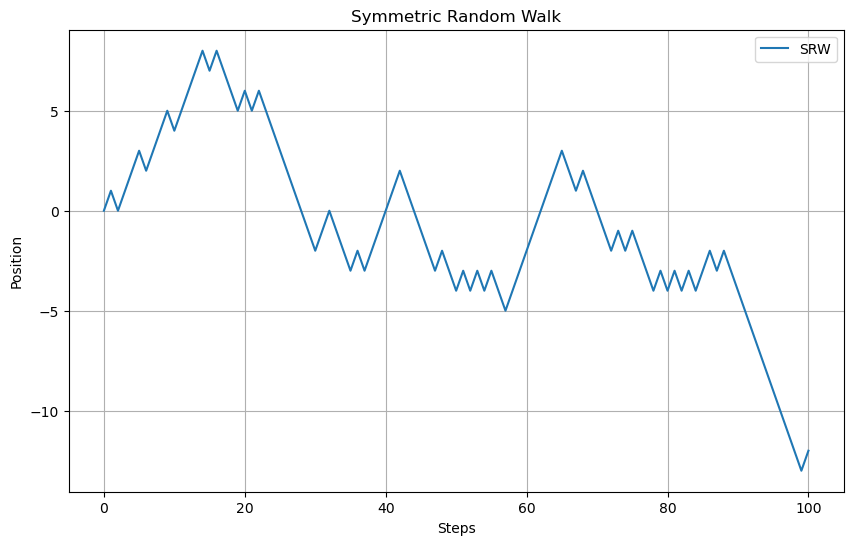

Saved plot to: C:\Users\LENOVO\scaled_symmetric_random_walk.png


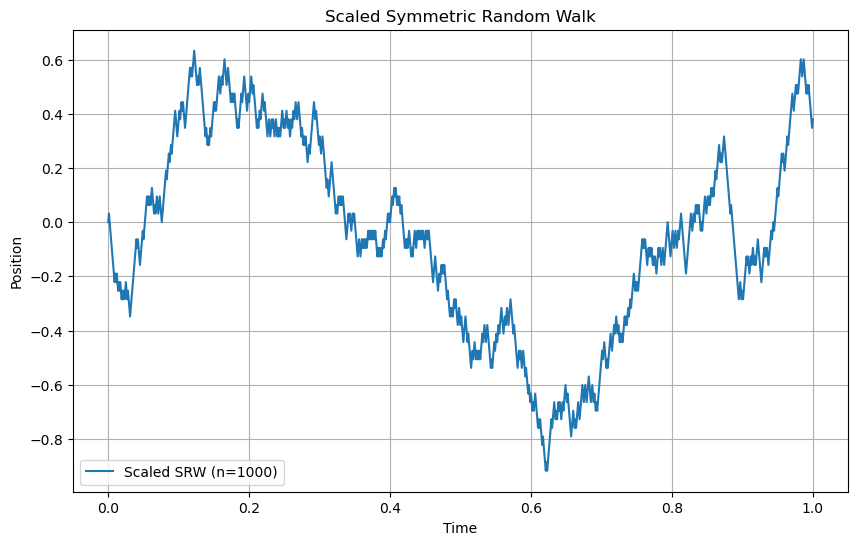

Saved plot to: C:\Users\LENOVO\brownian_motion_approximation.png


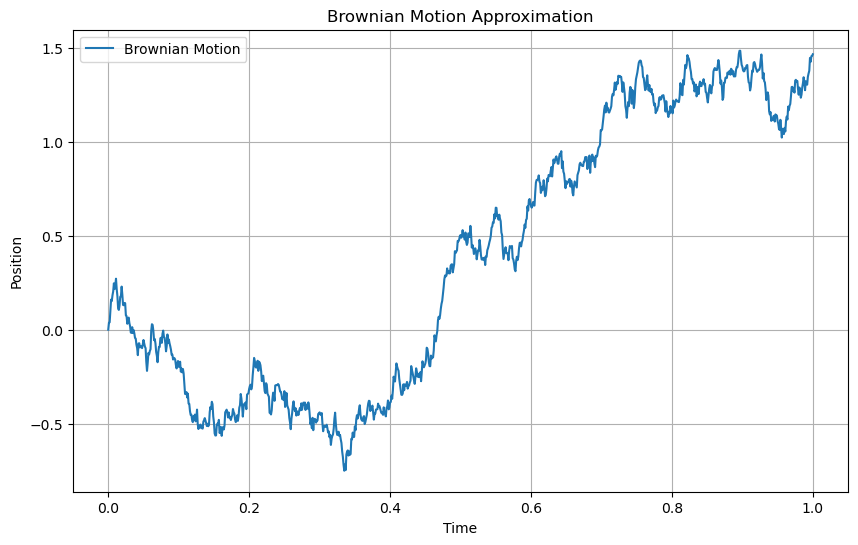

Saved plot to: C:\Users\LENOVO\quadratic_variation.png


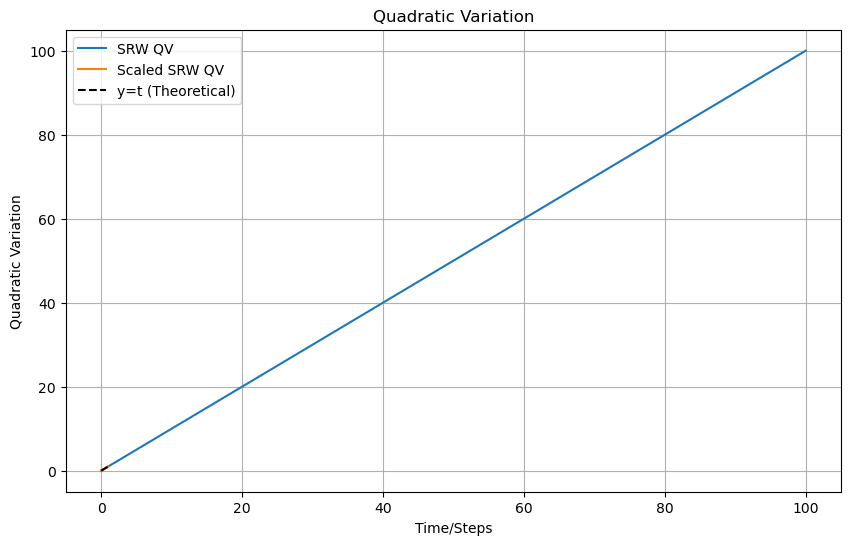

Saved plot to: C:\Users\LENOVO\distribution_scaled_srw.png


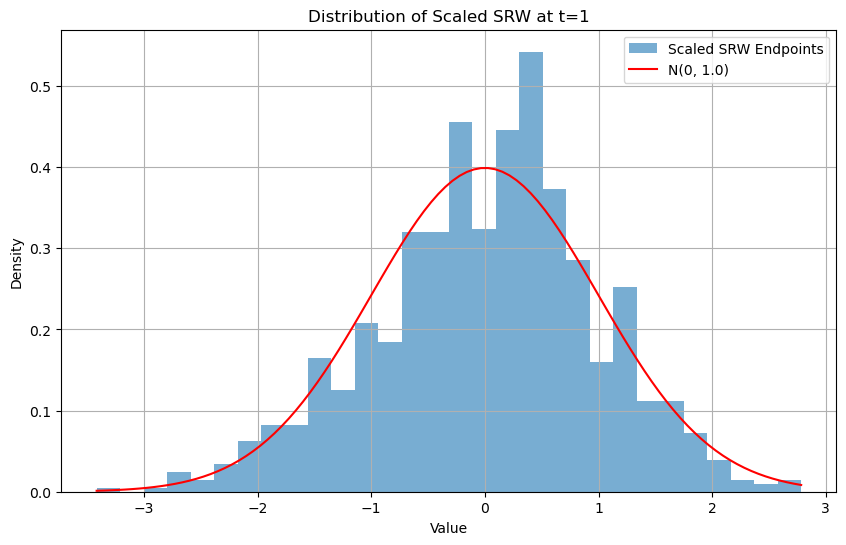

Saved plot to: C:\Users\LENOVO\martingale_property.png


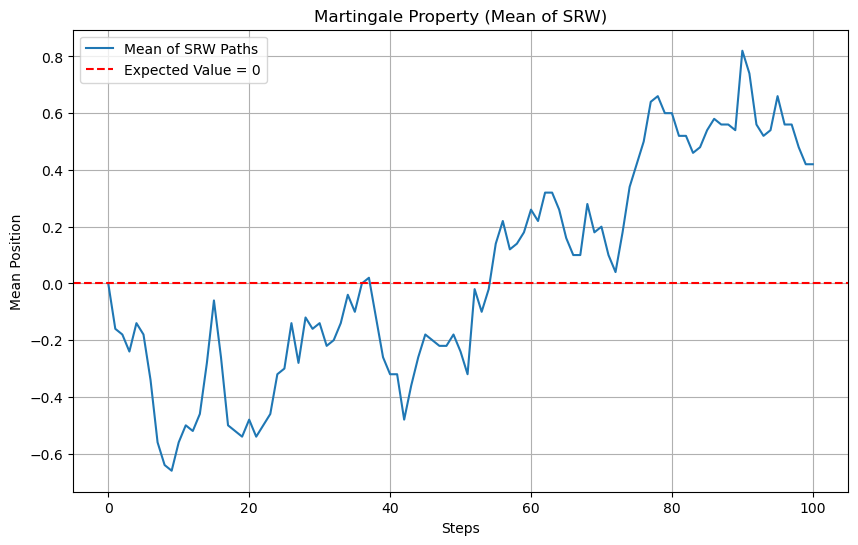

All plots generated and saved successfully!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Specify a directory to save the plots (modify this path as needed)
save_dir = current_dir  # You can change this to something like "/path/to/your/directory"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 1. Symmetric Random Walk (SRW)
def symmetric_random_walk(n_steps):
    steps = np.random.choice([1, -1], size=n_steps)  # Coin toss: +1 or -1
    srw = np.cumsum(np.concatenate(([0], steps)))    # Cumulative sum starting at 0
    return srw

# 2. Scaled Symmetric Random Walk
def scaled_srw(n, t_max=1.0):
    steps = np.random.choice([1, -1], size=n)  # n steps
    srw = np.cumsum(np.concatenate(([0], steps)))
    time = np.linspace(0, t_max, n + 1)       # Time points: 0 to t_max in n steps
    scaled_srw = srw / np.sqrt(n)             # Scale by 1/sqrt(n)
    return time, scaled_srw

# 3. Brownian Motion Approximation (fine time steps)
def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    increments = np.random.normal(0, np.sqrt(dt), n_steps)  # Normal increments
    bm = np.cumsum(np.concatenate(([0], increments)))
    time = np.linspace(0, t_max, n_steps + 1)
    return time, bm

# 4. Quadratic Variation
def quadratic_variation(path):
    increments = np.diff(path)  # Differences between consecutive points
    qv = np.cumsum(increments**2)  # Cumulative sum of squared increments
    return np.concatenate(([0], qv))

# 5. Simulate multiple scaled SRW paths to show distribution
def simulate_scaled_srw_endpoints(n_simulations, n_steps, t_max=1.0):
    endpoints = []
    for _ in range(n_simulations):
        _, path = scaled_srw(n_steps, t_max)
        endpoints.append(path[-1])
    return np.array(endpoints)

# Parameters
n_steps_srw = 100      # Steps for SRW
n_steps_scaled = 1000  # Steps for scaled SRW
t_max = 1.0            # Time horizon
n_simulations = 1000   # For distribution

# Generate paths
srw = symmetric_random_walk(n_steps_srw)
time_srw = np.arange(n_steps_srw + 1)
time_scaled, scaled_path = scaled_srw(n_steps_scaled, t_max)
time_bm, bm_path = brownian_motion(t_max, n_steps_scaled)

# Quadratic variations
qv_srw = quadratic_variation(srw)
qv_scaled = quadratic_variation(scaled_path)

# Distribution of scaled SRW endpoints
endpoints = simulate_scaled_srw_endpoints(n_simulations, n_steps_scaled, t_max)

# Plotting and Saving Each Plot Separately

# Plot 1: Symmetric Random Walk
plt.figure(figsize=(10, 6))
plt.plot(time_srw, srw, label='SRW')
plt.title('Symmetric Random Walk')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
file_path1 = os.path.join(save_dir, "symmetric_random_walk.png")
plt.savefig(file_path1)
print(f"Saved plot to: {file_path1}")
plt.show()
plt.close()

# Plot 2: Scaled Symmetric Random Walk
plt.figure(figsize=(10, 6))
plt.plot(time_scaled, scaled_path, label=f'Scaled SRW (n={n_steps_scaled})')
plt.title('Scaled Symmetric Random Walk')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
file_path2 = os.path.join(save_dir, "scaled_symmetric_random_walk.png")
plt.savefig(file_path2)
print(f"Saved plot to: {file_path2}")
plt.show()
plt.close()

# Plot 3: Brownian Motion
plt.figure(figsize=(10, 6))
plt.plot(time_bm, bm_path, label='Brownian Motion')
plt.title('Brownian Motion Approximation')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)
plt.legend()
file_path3 = os.path.join(save_dir, "brownian_motion_approximation.png")
plt.savefig(file_path3)
print(f"Saved plot to: {file_path3}")
plt.show()
plt.close()

# Plot 4: Quadratic Variation
plt.figure(figsize=(10, 6))
plt.plot(time_srw, qv_srw, label='SRW QV')
plt.plot(time_scaled, qv_scaled, label='Scaled SRW QV')
plt.plot(time_scaled, time_scaled, 'k--', label='y=t (Theoretical)')
plt.title('Quadratic Variation')
plt.xlabel('Time/Steps')
plt.ylabel('Quadratic Variation')
plt.grid(True)
plt.legend()
file_path4 = os.path.join(save_dir, "quadratic_variation.png")
plt.savefig(file_path4)
print(f"Saved plot to: {file_path4}")
plt.show()
plt.close()

# Plot 5: Distribution of Scaled SRW Endpoints
plt.figure(figsize=(10, 6))
plt.hist(endpoints, bins=30, density=True, alpha=0.6, label='Scaled SRW Endpoints')
x = np.linspace(min(endpoints), max(endpoints), 100)
plt.plot(x, norm.pdf(x, 0, np.sqrt(t_max)), 'r-', label=f'N(0, {t_max})')
plt.title('Distribution of Scaled SRW at t=1')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
file_path5 = os.path.join(save_dir, "distribution_scaled_srw.png")
plt.savefig(file_path5)
print(f"Saved plot to: {file_path5}")
plt.show()
plt.close()

# Plot 6: Martingale Property (Mean of Multiple SRW Paths)
n_paths = 100
srw_paths = np.array([symmetric_random_walk(n_steps_srw) for _ in range(n_paths)])
mean_srw = np.mean(srw_paths, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(time_srw, mean_srw, label='Mean of SRW Paths')
plt.axhline(0, color='r', linestyle='--', label='Expected Value = 0')
plt.title('Martingale Property (Mean of SRW)')
plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.grid(True)
plt.legend()
file_path6 = os.path.join(save_dir, "martingale_property.png")
plt.savefig(file_path6)
print(f"Saved plot to: {file_path6}")
plt.show()
plt.close()

print("All plots generated and saved successfully!")

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\srw_variance.png


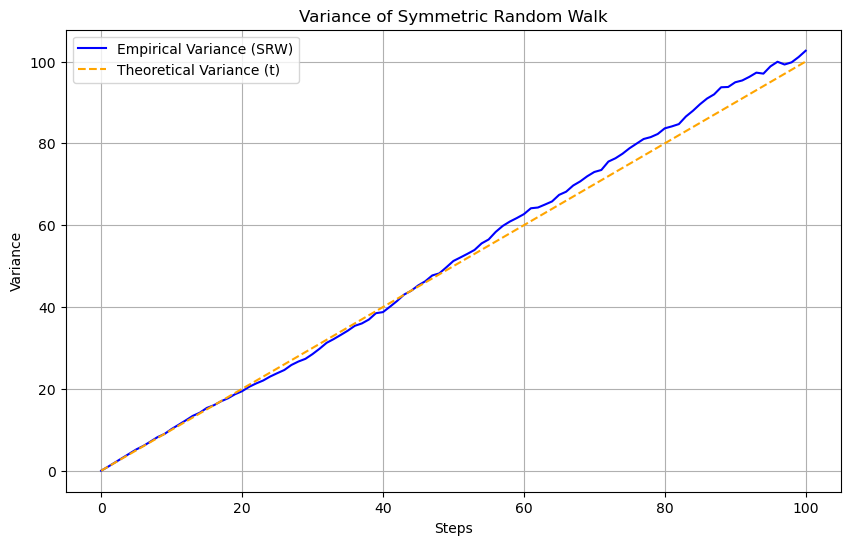

Saved plot to: C:\Users\LENOVO\srw_qv_multiple_paths.png


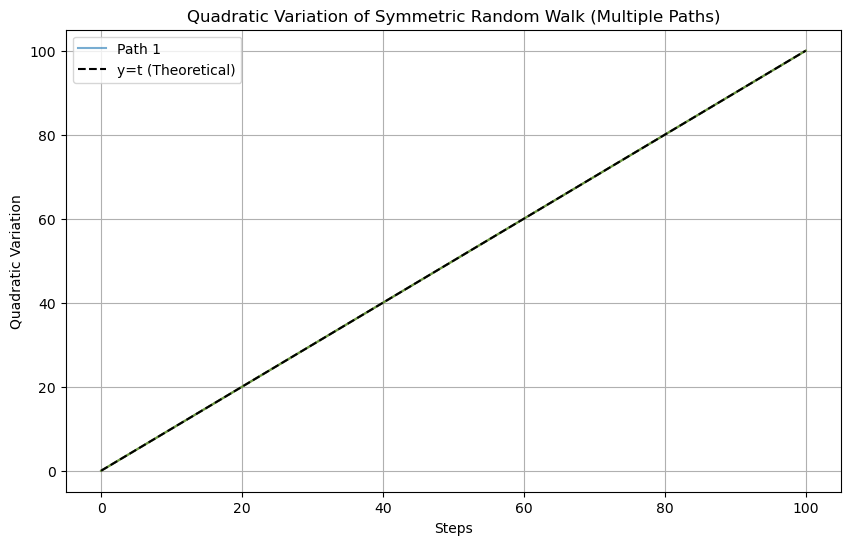

Saved plot to: C:\Users\LENOVO\asymmetric_srw_variance.png


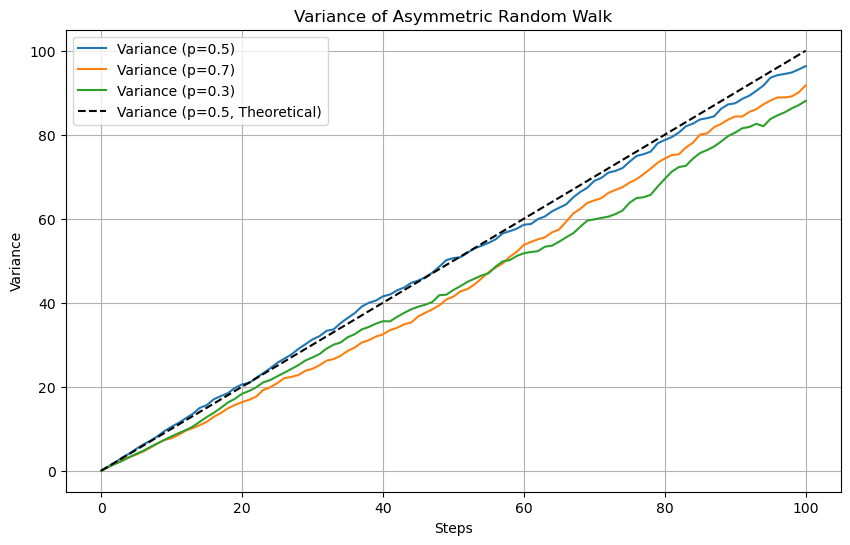

Saved plot to: C:\Users\LENOVO\asymmetric_srw_qv.png


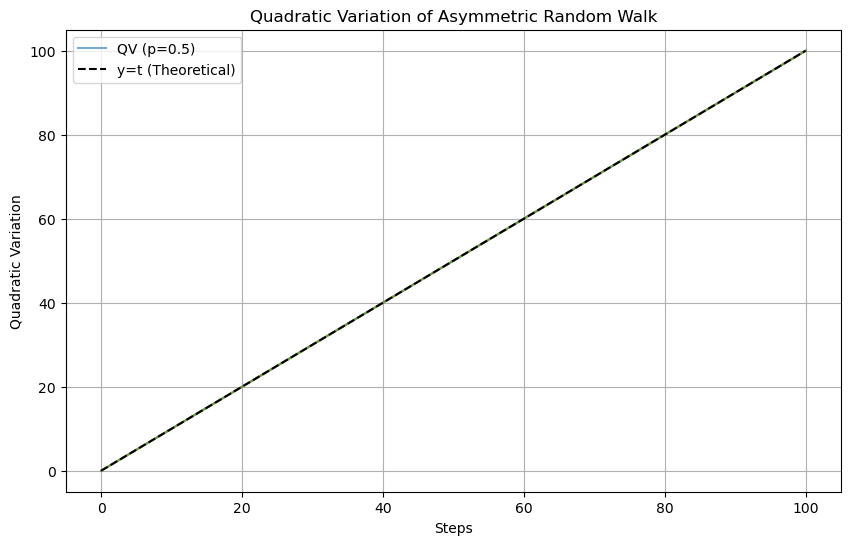

Saved plot to: C:\Users\LENOVO\path_dependent_qv.png


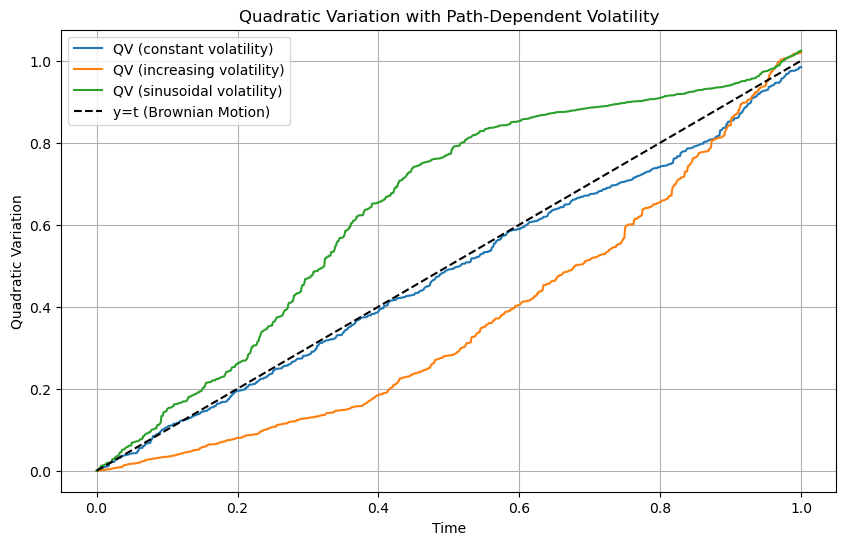

All plots generated and saved successfully!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir  # Modify this path if needed
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 1. Symmetric Random Walk (SRW)
def symmetric_random_walk(n_steps, p=0.5):
    steps = np.random.choice([1, -1], size=n_steps, p=[p, 1-p])  # Coin toss with probability p
    srw = np.cumsum(np.concatenate(([0], steps)))  # Cumulative sum starting at 0
    return srw

# 2. Quadratic Variation
def quadratic_variation(path):
    increments = np.diff(path)  # Differences between consecutive points
    qv = np.cumsum(increments**2)  # Cumulative sum of squared increments
    return np.concatenate(([0], qv))

# Parameters
n_steps = 100  # Number of steps
n_simulations = 1000  # For variance computation

# 1. Variance of SRW vs. Theoretical
positions = np.array([symmetric_random_walk(n_steps) for _ in range(n_simulations)])
variance = np.var(positions, axis=0)
time = np.arange(n_steps + 1)

plt.figure(figsize=(10, 6))
plt.plot(time, variance, label="Empirical Variance (SRW)", color="blue")
plt.plot(time, time, "--", label="Theoretical Variance (t)", color="orange")
plt.title("Variance of Symmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.grid(True)
plt.legend()
file_path1 = os.path.join(save_dir, "srw_variance.png")
plt.savefig(file_path1)
print(f"Saved plot to: {file_path1}")
plt.show()
plt.close()

# 2. Quadratic Variation of SRW (Multiple Paths)
plt.figure(figsize=(10, 6))
for i in range(3):  # Plot QV for 3 different paths
    srw = symmetric_random_walk(n_steps)
    qv = quadratic_variation(srw)
    plt.plot(time, qv, label=f"Path {i+1}" if i == 0 else None, alpha=0.6)
plt.plot(time, time, "k--", label="y=t (Theoretical)")
plt.title("Quadratic Variation of Symmetric Random Walk (Multiple Paths)")
plt.xlabel("Steps")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path2 = os.path.join(save_dir, "srw_qv_multiple_paths.png")
plt.savefig(file_path2)
print(f"Saved plot to: {file_path2}")
plt.show()
plt.close()

# 3. Asymmetric Random Walk: Variance vs. Quadratic Variation
p_values = [0.5, 0.7, 0.3]  # Different probabilities for up step
plt.figure(figsize=(10, 6))
for p in p_values:
    positions = np.array([symmetric_random_walk(n_steps, p) for _ in range(n_simulations)])
    variance = np.var(positions, axis=0)
    plt.plot(time, variance, label=f"Variance (p={p})")
plt.plot(time, time, "k--", label="Variance (p=0.5, Theoretical)")
plt.title("Variance of Asymmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.grid(True)
plt.legend()
file_path3 = os.path.join(save_dir, "asymmetric_srw_variance.png")
plt.savefig(file_path3)
print(f"Saved plot to: {file_path3}")
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
for p in p_values:
    srw = symmetric_random_walk(n_steps, p)
    qv = quadratic_variation(srw)
    plt.plot(time, qv, label=f"QV (p={p})" if p == 0.5 else None, alpha=0.6)
plt.plot(time, time, "k--", label="y=t (Theoretical)")
plt.title("Quadratic Variation of Asymmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path4 = os.path.join(save_dir, "asymmetric_srw_qv.png")
plt.savefig(file_path4)
print(f"Saved plot to: {file_path4}")
plt.show()
plt.close()

# 4. Path Dependency in a General Process (Brownian Motion with Varying Volatility)
def brownian_with_volatility(t_max=1.0, n_steps=1000, vol_type="constant"):
    dt = t_max / n_steps
    time = np.linspace(0, t_max, n_steps + 1)
    if vol_type == "constant":
        vol = np.ones(n_steps)  # Constant volatility
    elif vol_type == "increasing":
        vol = np.linspace(0.5, 1.5, n_steps)  # Increasing volatility
    elif vol_type == "sinusoidal":
        vol = 1 + 0.5 * np.sin(2 * np.pi * time[1:] / t_max)  # Sinusoidal volatility
    increments = np.random.normal(0, np.sqrt(dt), n_steps) * vol
    path = np.cumsum(np.concatenate(([0], increments)))
    return time, path

plt.figure(figsize=(10, 6))
for vol_type in ["constant", "increasing", "sinusoidal"]:
    time, path = brownian_with_volatility(vol_type=vol_type)
    qv = quadratic_variation(path)
    plt.plot(time, qv, label=f"QV ({vol_type} volatility)")
plt.plot(time, time, "k--", label="y=t (Brownian Motion)")
plt.title("Quadratic Variation with Path-Dependent Volatility")
plt.xlabel("Time")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path5 = os.path.join(save_dir, "path_dependent_qv.png")
plt.savefig(file_path5)
print(f"Saved plot to: {file_path5}")
plt.show()
plt.close()

print("All plots generated and saved successfully!")

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\srw_qv_difference.png


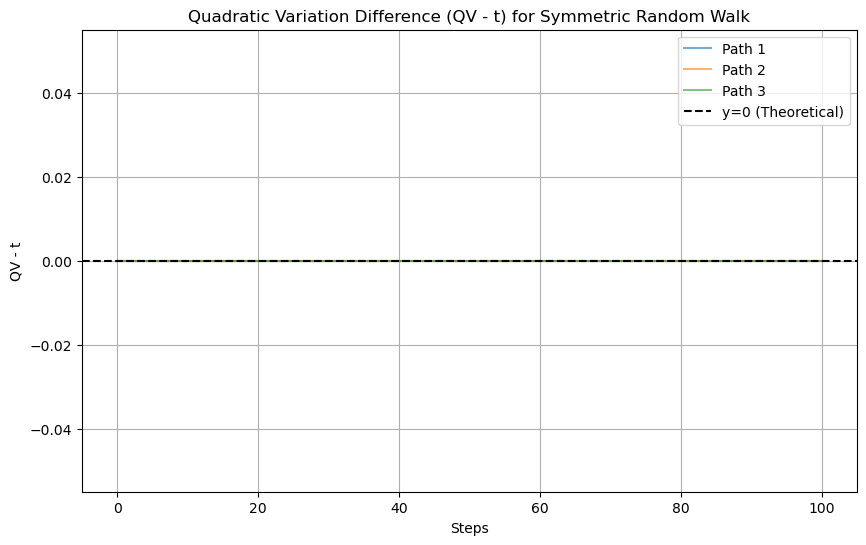

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir  # Modify this path if needed
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Symmetric Random Walk (SRW)
def symmetric_random_walk(n_steps, p=0.5):
    steps = np.random.choice([1, -1], size=n_steps, p=[p, 1-p])
    srw = np.cumsum(np.concatenate(([0], steps)))
    return srw

# Quadratic Variation
def quadratic_variation(path):
    increments = np.diff(path)
    qv = np.cumsum(increments**2)
    return np.concatenate(([0], qv))

# Parameters
n_steps = 100

# Plot Quadratic Variation Difference (QV - t)
time = np.arange(n_steps + 1)
plt.figure(figsize=(10, 6))
for i in range(3):  # Plot QV for 3 different paths
    srw = symmetric_random_walk(n_steps)
    qv = quadratic_variation(srw)
    plt.plot(time, qv - time, label=f"Path {i+1}", alpha=0.6)
plt.axhline(0, color="k", linestyle="--", label="y=0 (Theoretical)")
plt.title("Quadratic Variation Difference (QV - t) for Symmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("QV - t")
plt.grid(True)
plt.legend()
file_path = os.path.join(save_dir, "srw_qv_difference.png")
plt.savefig(file_path)
print(f"Saved plot to: {file_path}")
plt.show()
plt.close()

Current working directory: C:\Users\LENOVO
First 5 positions of SRW: [ 0  1  0 -1 -2]
First 5 increments: [ 1 -1 -1 -1  1]
First 5 squared increments: [1 1 1 1 1]
First 5 QV values: [0 1 2 3 4]
First 5 time values: [0 1 2 3 4]
First 5 QV - time values: [0 0 0 0 0]
Saved plot to: C:\Users\LENOVO\srw_qv_difference.png


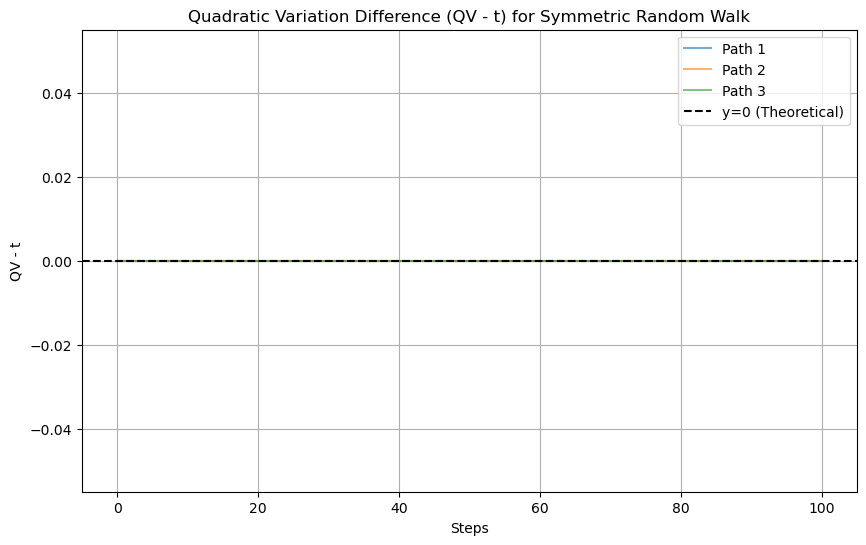

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Symmetric Random Walk (SRW)
def symmetric_random_walk(n_steps, p=0.5):
    steps = np.random.choice([1, -1], size=n_steps, p=[p, 1-p])
    srw = np.cumsum(np.concatenate(([0], steps)))
    return srw

# Quadratic Variation
def quadratic_variation(path):
    increments = np.diff(path)
    qv = np.cumsum(increments**2)
    return np.concatenate(([0], qv))

# Parameters
n_steps = 100

# Debug: Test one path
srw = symmetric_random_walk(n_steps)
qv = quadratic_variation(srw)
time = np.arange(n_steps + 1)

print("First 5 positions of SRW:", srw[:5])
print("First 5 increments:", np.diff(srw)[:5])
print("First 5 squared increments:", (np.diff(srw)[:5])**2)
print("First 5 QV values:", qv[:5])
print("First 5 time values:", time[:5])
print("First 5 QV - time values:", (qv - time)[:5])

# Plot Quadratic Variation Difference (QV - t)
plt.figure(figsize=(10, 6))
for i in range(3):
    srw = symmetric_random_walk(n_steps)
    qv = quadratic_variation(srw)
    plt.plot(time, qv - time, label=f"Path {i+1}", alpha=0.6)
plt.axhline(0, color="k", linestyle="--", label="y=0 (Theoretical)")
plt.title("Quadratic Variation Difference (QV - t) for Symmetric Random Walk")
plt.xlabel("Steps")
plt.ylabel("QV - t")
plt.grid(True)
plt.legend()
file_path = os.path.join(save_dir, "srw_qv_difference.png")
plt.savefig(file_path)
print(f"Saved plot to: {file_path}")
plt.show()
plt.close()

# Lecture 2 : Properties of Brownian Motion

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\bm_covariance.png


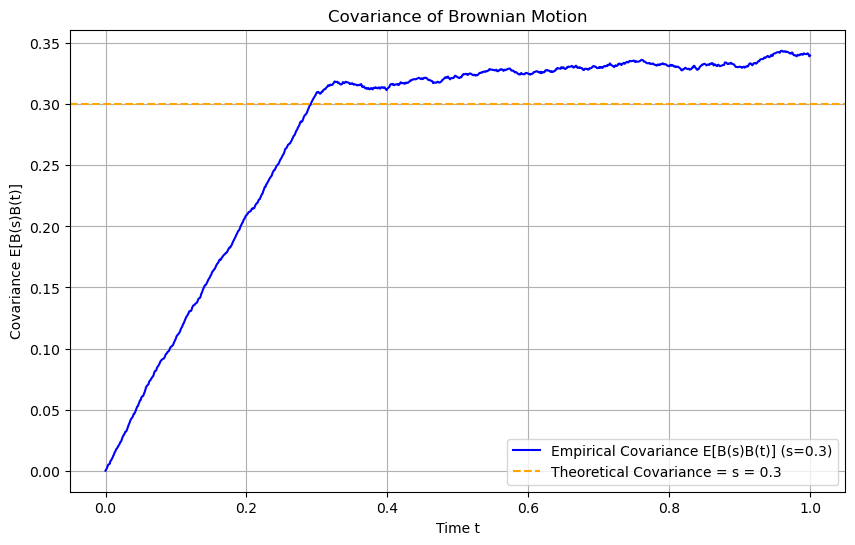

Saved plot to: C:\Users\LENOVO\bm_covariance_heatmap.png


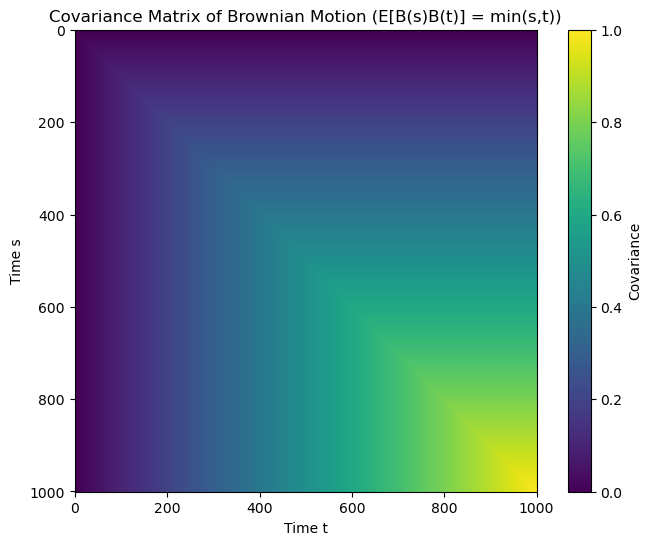

Saved plot to: C:\Users\LENOVO\bm_nondifferentiability_zoom.png


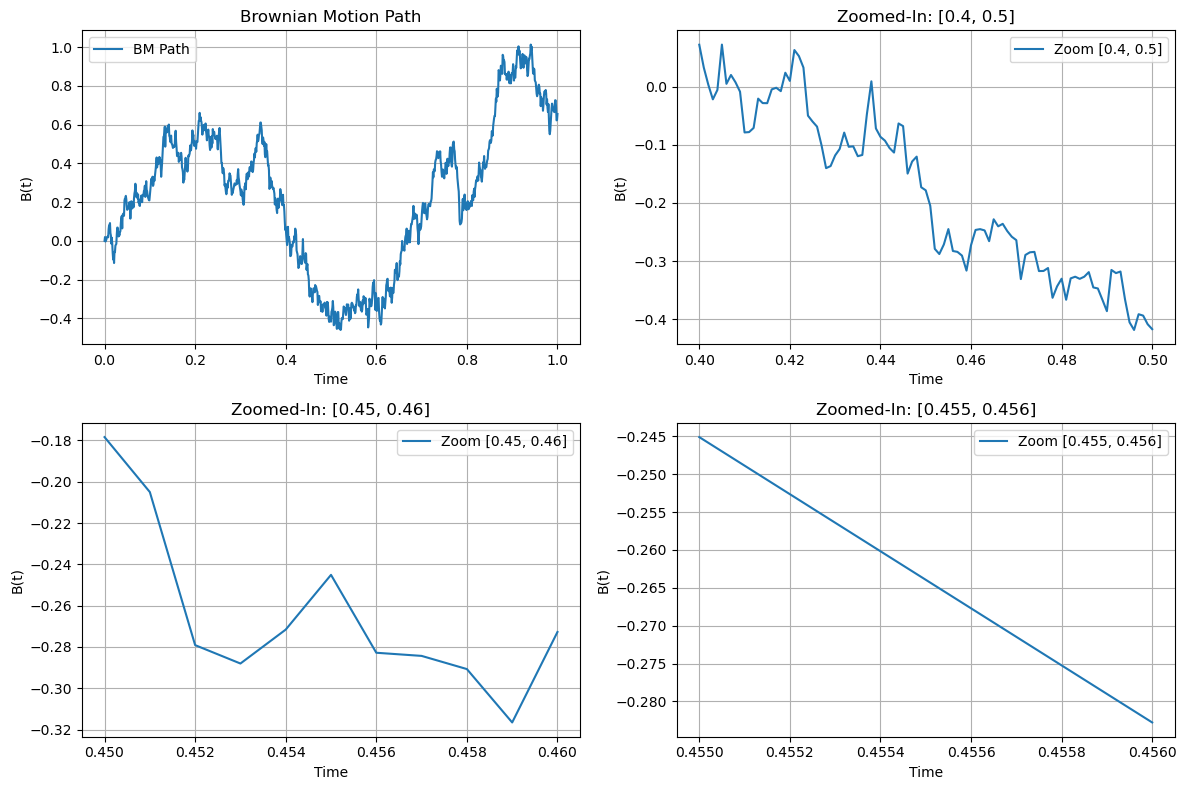

Saved plot to: C:\Users\LENOVO\bm_increments.png


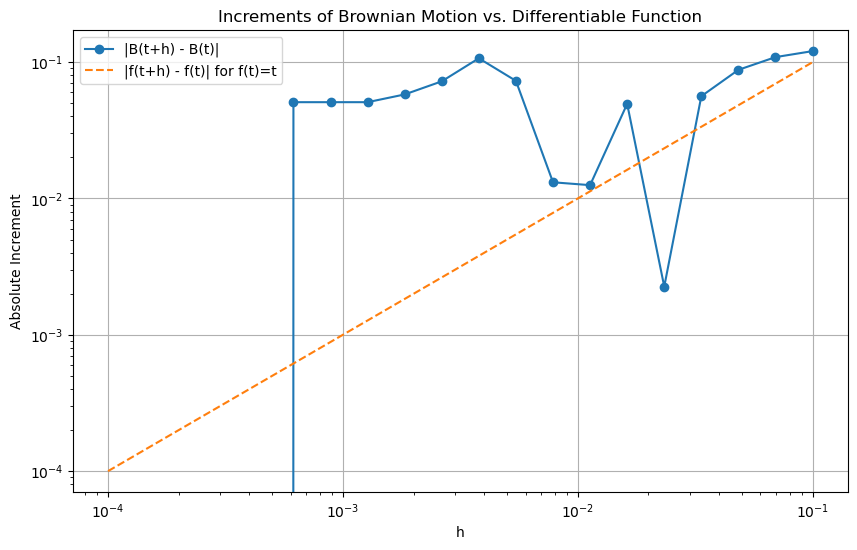

Saved plot to: C:\Users\LENOVO\bm_scaling_theorem2.png


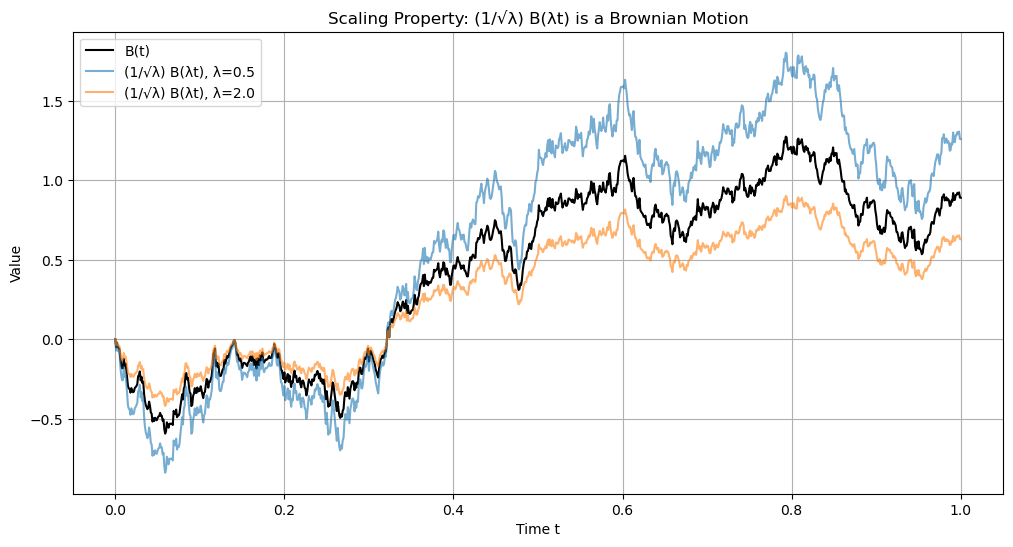

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1001,)

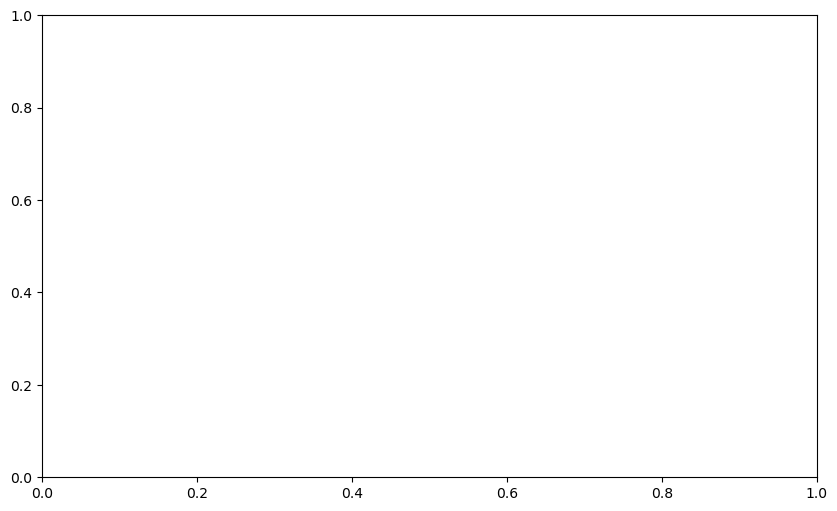

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Simulate a Brownian Motion path
def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    time = np.linspace(0, t_max, n_steps + 1)
    increments = np.random.normal(0, np.sqrt(dt), n_steps)
    path = np.cumsum(np.concatenate(([0], increments)))
    return time, path

# Quadratic Variation
def quadratic_variation(path, time, partition_size):
    qv = []
    for t in time:
        indices = np.arange(0, len(time), partition_size)
        if indices[-1] != len(time) - 1:
            indices = np.append(indices, len(time) - 1)
        sub_path = path[indices]
        increments = np.diff(sub_path) ** 2
        qv.append(np.sum(increments))
    return np.array(qv)

# 1. Covariance of Brownian Motion
n_simulations = 1000
t_max = 1.0
n_steps = 1000
time, _ = brownian_motion(t_max, n_steps)
paths = np.array([brownian_motion(t_max, n_steps)[1] for _ in range(n_simulations)])

# Compute empirical covariance for fixed s and varying t
s_idx = int(0.3 * n_steps)  # s = 0.3
s = time[s_idx]
cov_empirical = np.mean(paths[:, s_idx, np.newaxis] * paths, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time, cov_empirical, label="Empirical Covariance E[B(s)B(t)] (s=0.3)", color="blue")
plt.axhline(s, color="orange", linestyle="--", label=f"Theoretical Covariance = s = {s}")
plt.title("Covariance of Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Covariance E[B(s)B(t)]")
plt.grid(True)
plt.legend()
file_path1 = os.path.join(save_dir, "bm_covariance.png")
plt.savefig(file_path1)
print(f"Saved plot to: {file_path1}")
plt.show()
plt.close()

# Heatmap of Covariance Matrix
cov_matrix = np.zeros((n_steps + 1, n_steps + 1))
for i in range(n_steps + 1):
    for j in range(n_steps + 1):
        cov_matrix[i, j] = min(time[i], time[j])

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix of Brownian Motion (E[B(s)B(t)] = min(s,t))")
plt.xlabel("Time t")
plt.ylabel("Time s")
file_path2 = os.path.join(save_dir, "bm_covariance_heatmap.png")
plt.savefig(file_path2)
print(f"Saved plot to: {file_path2}")
plt.show()
plt.close()

# 2. Non-Differentiability of Brownian Paths
# Zoom-in on a BM path
time, path = brownian_motion(t_max=1.0, n_steps=1000)
plt.figure(figsize=(12, 8))

# Full path
plt.subplot(2, 2, 1)
plt.plot(time, path, label="BM Path")
plt.title("Brownian Motion Path")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 1: t in [0.4, 0.5]
zoom_idx = (time >= 0.4) & (time <= 0.5)
plt.subplot(2, 2, 2)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.4, 0.5]")
plt.title("Zoomed-In: [0.4, 0.5]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 2: t in [0.45, 0.46]
zoom_idx = (time >= 0.45) & (time <= 0.46)
plt.subplot(2, 2, 3)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.45, 0.46]")
plt.title("Zoomed-In: [0.45, 0.46]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 3: t in [0.455, 0.456]
zoom_idx = (time >= 0.455) & (time <= 0.456)
plt.subplot(2, 2, 4)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.455, 0.456]")
plt.title("Zoomed-In: [0.455, 0.456]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
file_path3 = os.path.join(save_dir, "bm_nondifferentiability_zoom.png")
plt.savefig(file_path3)
print(f"Saved plot to: {file_path3}")
plt.show()
plt.close()

# Increments comparison
h_values = np.logspace(-4, -1, 20)  # Small h values
t0 = 0.5
increments_bm = []
increments_linear = []
for h in h_values:
    idx1 = np.argmin(np.abs(time - t0))
    idx2 = np.argmin(np.abs(time - (t0 + h)))
    increments_bm.append(np.abs(path[idx2] - path[idx1]))
    increments_linear.append(h)  # For f(t) = t, |f(t+h) - f(t)| = h

plt.figure(figsize=(10, 6))
plt.loglog(h_values, increments_bm, label="|B(t+h) - B(t)|", marker="o")
plt.loglog(h_values, increments_linear, label="|f(t+h) - f(t)| for f(t)=t", linestyle="--")
plt.title("Increments of Brownian Motion vs. Differentiable Function")
plt.xlabel("h")
plt.ylabel("Absolute Increment")
plt.grid(True)
plt.legend()
file_path4 = os.path.join(save_dir, "bm_increments.png")
plt.savefig(file_path4)
print(f"Saved plot to: {file_path4}")
plt.show()
plt.close()

# 3. Scaling Properties of Brownian Motion
# Theorem 2: (1/sqrt(lambda)) B(lambda t)
lambda_values = [0.5, 2.0]
plt.figure(figsize=(12, 6))
time, path = brownian_motion(t_max=1.0, n_steps=1000)
plt.plot(time, path, label="B(t)", color="black")

for lam in lambda_values:
    scaled_time = time * lam
    scaled_path = (1 / np.sqrt(lam)) * path
    plt.plot(time, scaled_path, label=f"(1/√λ) B(λt), λ={lam}", alpha=0.6)

plt.title("Scaling Property: (1/√λ) B(λt) is a Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
file_path5 = os.path.join(save_dir, "bm_scaling_theorem2.png")
plt.savefig(file_path5)
print(f"Saved plot to: {file_path5}")
plt.show()
plt.close()

# Theorem 3: t B(1/t)
time = np.linspace(0.01, 1.0, 1000)  # Avoid t=0
time_inv = 1 / time
_, path_inv = brownian_motion(t_max=max(time_inv), n_steps=1000)
path_inv = np.interp(time_inv, np.linspace(0, max(time_inv), 1001), path_inv)
path_transformed = time * path_inv

plt.figure(figsize=(10, 6))
plt.plot(time, path, label="B(t)", color="black")
plt.plot(time, path_transformed, label="t B(1/t)", alpha=0.6)
plt.title("Scaling Property: t B(1/t) is a Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
file_path6 = os.path.join(save_dir, "bm_scaling_theorem3.png")
plt.savefig(file_path6)
print(f"Saved plot to: {file_path6}")
plt.show()
plt.close()

# 4. Quadratic Variation of Brownian Motion
time, path = brownian_motion(t_max=1.0, n_steps=1000)
partition_sizes = [10, 50, 100]
plt.figure(figsize=(10, 6))
for ps in partition_sizes:
    qv = quadratic_variation(path, time, ps)
    plt.plot(time[::ps], qv[::ps], label=f"Partition size {ps}", alpha=0.6)

# Quadratic variation of a differentiable function f(t) = t
f = time  # f(t) = t
qv_f = quadratic_variation(f, time, 10)
plt.plot(time[::10], qv_f[::10], label="f(t)=t (Partition size 10)", linestyle="--")

plt.plot(time, time, "k--", label="y=t (Theoretical for BM)")
plt.title("Quadratic Variation of Brownian Motion vs. Differentiable Function")
plt.xlabel("Time")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path7 = os.path.join(save_dir, "bm_quadratic_variation.png")
plt.savefig(file_path7)
print(f"Saved plot to: {file_path7}")
plt.show()
plt.close()

# 5. Volatility in Geometric Brownian Motion
S0 = 100
sigma = 0.2
alpha = 0.05
t_max = 1.0
n_steps = 1000
time, bm_path = brownian_motion(t_max, n_steps)
S = S0 * np.exp(sigma * bm_path + (alpha - sigma**2 / 2) * time)

plt.figure(figsize=(10, 6))
plt.plot(time, S, label="Geometric BM S(t)")
plt.title("Geometric Brownian Motion (Asset Price)")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
file_path8 = os.path.join(save_dir, "geometric_bm.png")
plt.savefig(file_path8)
print(f"Saved plot to: {file_path8}")
plt.show()
plt.close()

# Realized Volatility from Log-Returns
T1, T2 = 0.2, 0.8
idx1, idx2 = np.argmin(np.abs(time - T1)), np.argmin(np.abs(time - T2))
sub_time = time[idx1:idx2+1]
sub_S = S[idx1:idx2+1]
log_returns = np.diff(np.log(sub_S))
partition_sizes = [5, 10, 20]
plt.figure(figsize=(10, 6))
for ps in partition_sizes:
    indices = np.arange(0, len(log_returns), ps)
    if indices[-1] != len(log_returns) - 1:
        indices = np.append(indices, len(log_returns) - 1)
    realized_vol = np.cumsum((log_returns[indices[:-1]])**2)
    plt.plot(sub_time[indices[:-1]], realized_vol, label=f"Partition size {ps}", alpha=0.6)

plt.axhline(sigma**2 * (T2 - T1), color="k", linestyle="--", label=f"Theoretical = σ²(T₂-T₁) = {sigma**2 * (T2 - T1):.3f}")
plt.title("Realized Volatility from Log-Returns of Geometric BM")
plt.xlabel("Time")
plt.ylabel("Realized Volatility")
plt.grid(True)
plt.legend()
file_path9 = os.path.join(save_dir, "geometric_bm_volatility.png")
plt.savefig(file_path9)
print(f"Saved plot to: {file_path9}")
plt.show()
plt.close()

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\bm_covariance.png


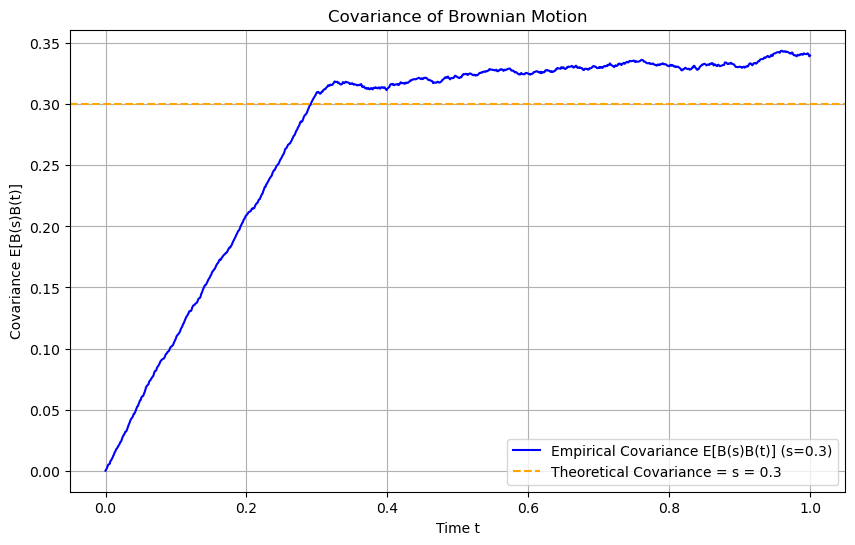

Saved plot to: C:\Users\LENOVO\bm_covariance_heatmap.png


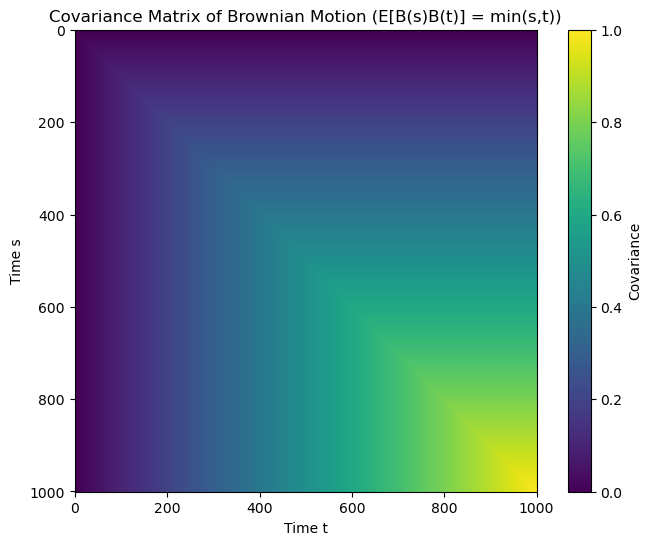

Saved plot to: C:\Users\LENOVO\bm_nondifferentiability_zoom.png


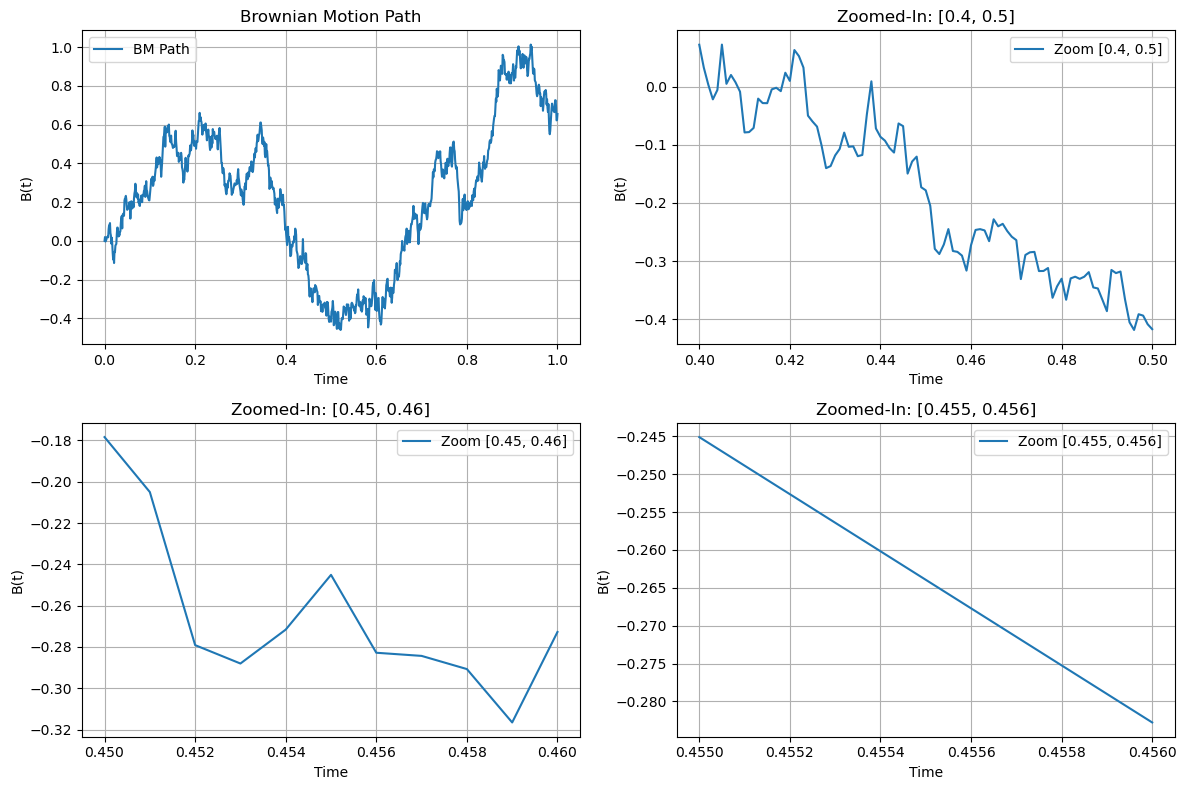

Saved plot to: C:\Users\LENOVO\bm_increments.png


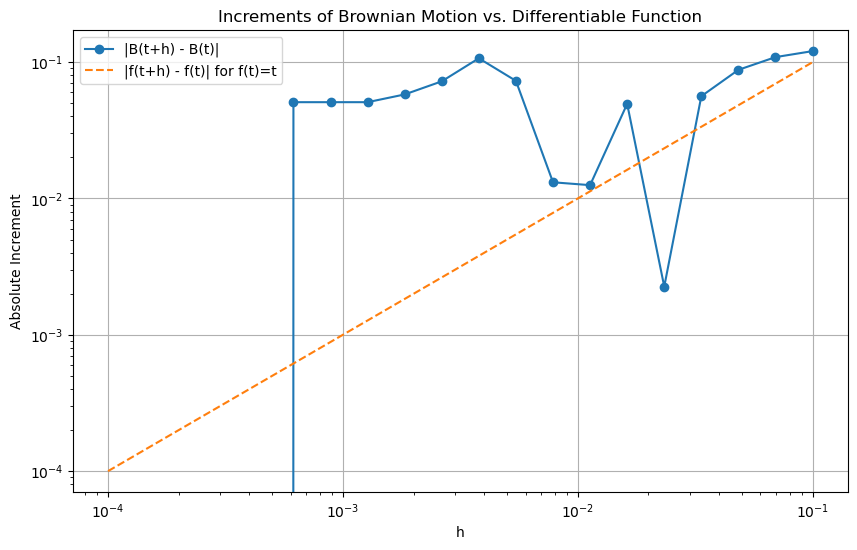

Saved plot to: C:\Users\LENOVO\bm_scaling_theorem2.png


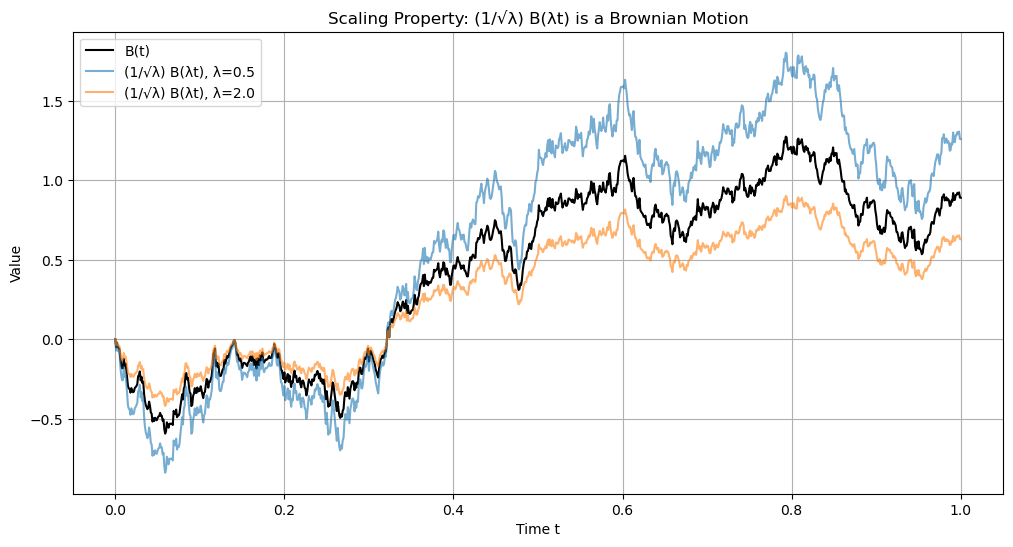

Saved plot to: C:\Users\LENOVO\bm_scaling_theorem3.png


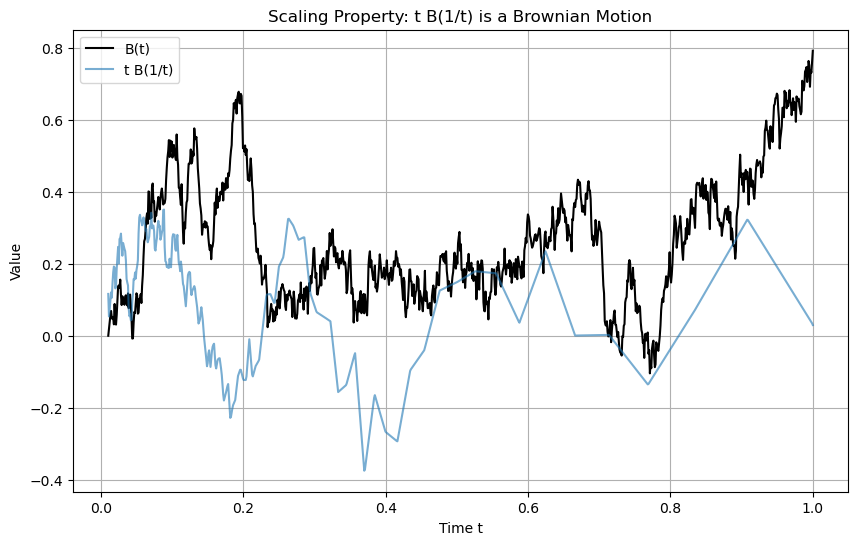

Saved plot to: C:\Users\LENOVO\bm_quadratic_variation.png


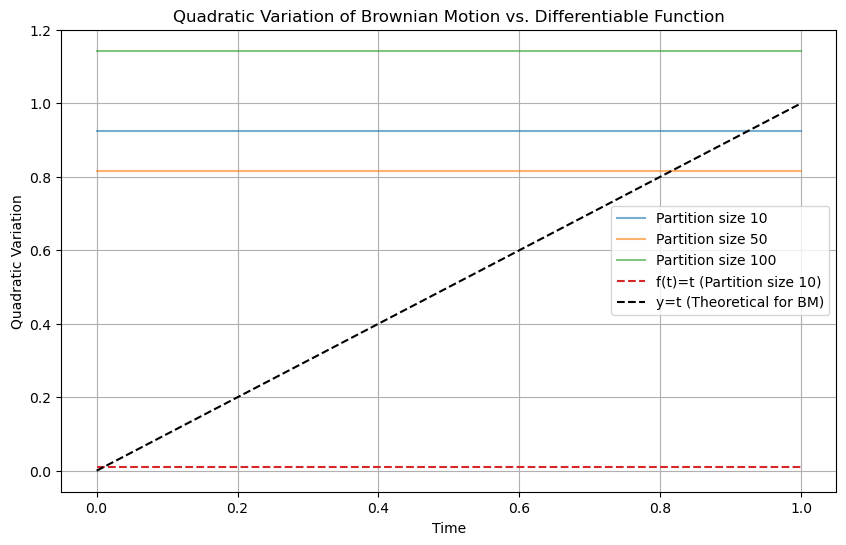

Saved plot to: C:\Users\LENOVO\geometric_bm.png


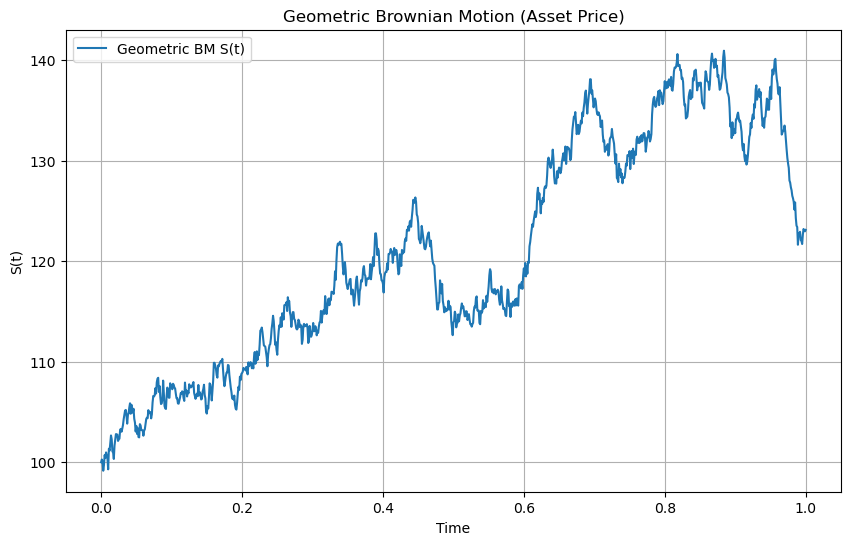

Saved plot to: C:\Users\LENOVO\geometric_bm_volatility.png


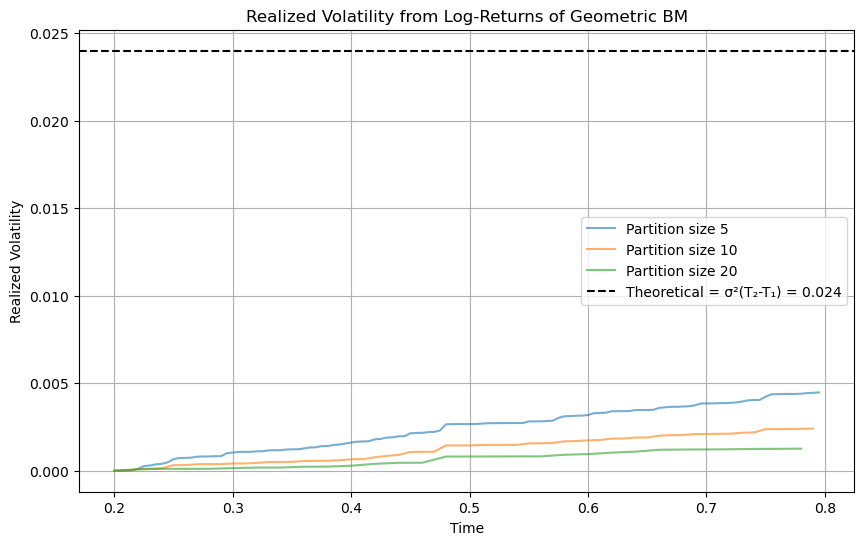

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Simulate a Brownian Motion path
def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    time = np.linspace(0, t_max, n_steps + 1)
    increments = np.random.normal(0, np.sqrt(dt), n_steps)
    path = np.cumsum(np.concatenate(([0], increments)))
    return time, path

# Quadratic Variation
def quadratic_variation(path, time, partition_size):
    qv = []
    for t in time:
        indices = np.arange(0, len(time), partition_size)
        if indices[-1] != len(time) - 1:
            indices = np.append(indices, len(time) - 1)
        sub_path = path[indices]
        increments = np.diff(sub_path) ** 2
        qv.append(np.sum(increments))
    return np.array(qv)

# 1. Covariance of Brownian Motion
n_simulations = 1000
t_max = 1.0
n_steps = 1000
time, _ = brownian_motion(t_max, n_steps)
paths = np.array([brownian_motion(t_max, n_steps)[1] for _ in range(n_simulations)])

# Compute empirical covariance for fixed s and varying t
s_idx = int(0.3 * n_steps)  # s = 0.3
s = time[s_idx]
cov_empirical = np.mean(paths[:, s_idx, np.newaxis] * paths, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time, cov_empirical, label="Empirical Covariance E[B(s)B(t)] (s=0.3)", color="blue")
plt.axhline(s, color="orange", linestyle="--", label=f"Theoretical Covariance = s = {s}")
plt.title("Covariance of Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Covariance E[B(s)B(t)]")
plt.grid(True)
plt.legend()
file_path1 = os.path.join(save_dir, "bm_covariance.png")
plt.savefig(file_path1)
print(f"Saved plot to: {file_path1}")
plt.show()
plt.close()

# Heatmap of Covariance Matrix
cov_matrix = np.zeros((n_steps + 1, n_steps + 1))
for i in range(n_steps + 1):
    for j in range(n_steps + 1):
        cov_matrix[i, j] = min(time[i], time[j])

plt.figure(figsize=(8, 6))
plt.imshow(cov_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix of Brownian Motion (E[B(s)B(t)] = min(s,t))")
plt.xlabel("Time t")
plt.ylabel("Time s")
file_path2 = os.path.join(save_dir, "bm_covariance_heatmap.png")
plt.savefig(file_path2)
print(f"Saved plot to: {file_path2}")
plt.show()
plt.close()

# 2. Non-Differentiability of Brownian Paths
# Zoom-in on a BM path
time, path = brownian_motion(t_max=1.0, n_steps=1000)
plt.figure(figsize=(12, 8))

# Full path
plt.subplot(2, 2, 1)
plt.plot(time, path, label="BM Path")
plt.title("Brownian Motion Path")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 1: t in [0.4, 0.5]
zoom_idx = (time >= 0.4) & (time <= 0.5)
plt.subplot(2, 2, 2)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.4, 0.5]")
plt.title("Zoomed-In: [0.4, 0.5]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 2: t in [0.45, 0.46]
zoom_idx = (time >= 0.45) & (time <= 0.46)
plt.subplot(2, 2, 3)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.45, 0.46]")
plt.title("Zoomed-In: [0.45, 0.46]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

# Zoom 3: t in [0.455, 0.456]
zoom_idx = (time >= 0.455) & (time <= 0.456)
plt.subplot(2, 2, 4)
plt.plot(time[zoom_idx], path[zoom_idx], label="Zoom [0.455, 0.456]")
plt.title("Zoomed-In: [0.455, 0.456]")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()

plt.tight_layout()
file_path3 = os.path.join(save_dir, "bm_nondifferentiability_zoom.png")
plt.savefig(file_path3)
print(f"Saved plot to: {file_path3}")
plt.show()
plt.close()

# Increments comparison
h_values = np.logspace(-4, -1, 20)  # Small h values
t0 = 0.5
increments_bm = []
increments_linear = []
for h in h_values:
    idx1 = np.argmin(np.abs(time - t0))
    idx2 = np.argmin(np.abs(time - (t0 + h)))
    increments_bm.append(np.abs(path[idx2] - path[idx1]))
    increments_linear.append(h)  # For f(t) = t, |f(t+h) - f(t)| = h

plt.figure(figsize=(10, 6))
plt.loglog(h_values, increments_bm, label="|B(t+h) - B(t)|", marker="o")
plt.loglog(h_values, increments_linear, label="|f(t+h) - f(t)| for f(t)=t", linestyle="--")
plt.title("Increments of Brownian Motion vs. Differentiable Function")
plt.xlabel("h")
plt.ylabel("Absolute Increment")
plt.grid(True)
plt.legend()
file_path4 = os.path.join(save_dir, "bm_increments.png")
plt.savefig(file_path4)
print(f"Saved plot to: {file_path4}")
plt.show()
plt.close()

# 3. Scaling Properties of Brownian Motion
# Theorem 2: (1/sqrt(lambda)) B(lambda t)
lambda_values = [0.5, 2.0]
plt.figure(figsize=(12, 6))
time, path = brownian_motion(t_max=1.0, n_steps=1000)
plt.plot(time, path, label="B(t)", color="black")

for lam in lambda_values:
    scaled_time = time * lam
    scaled_path = (1 / np.sqrt(lam)) * path
    plt.plot(time, scaled_path, label=f"(1/√λ) B(λt), λ={lam}", alpha=0.6)

plt.title("Scaling Property: (1/√λ) B(λt) is a Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
file_path5 = os.path.join(save_dir, "bm_scaling_theorem2.png")
plt.savefig(file_path5)
print(f"Saved plot to: {file_path5}")
plt.show()
plt.close()

# Theorem 3: t B(1/t)
# Generate time and path for t in [0.01, 1.0]
time = np.linspace(0.01, 1.0, 1000)  # Avoid t=0
time_inv = 1 / time
# Generate a BM path for the original time grid
time_bm, path = brownian_motion(t_max=1.0, n_steps=999)  # 999 steps to get 1000 points
# Generate a BM path for the inverse time grid
time_inv_max = max(time_inv)  # 1/0.01 = 100
time_inv_grid = np.linspace(0, time_inv_max, 1000)
increments = np.random.normal(0, np.sqrt(time_inv_max / 999), 999)
path_inv = np.cumsum(np.concatenate(([0], increments)))
# Interpolate path_inv to match time_inv
path_inv_interp = np.interp(time_inv, time_inv_grid, path_inv)
path_transformed = time * path_inv_interp

plt.figure(figsize=(10, 6))
plt.plot(time, path, label="B(t)", color="black")
plt.plot(time, path_transformed, label="t B(1/t)", alpha=0.6)
plt.title("Scaling Property: t B(1/t) is a Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
file_path6 = os.path.join(save_dir, "bm_scaling_theorem3.png")
plt.savefig(file_path6)
print(f"Saved plot to: {file_path6}")
plt.show()
plt.close()

# 4. Quadratic Variation of Brownian Motion
time, path = brownian_motion(t_max=1.0, n_steps=1000)
partition_sizes = [10, 50, 100]
plt.figure(figsize=(10, 6))
for ps in partition_sizes:
    qv = quadratic_variation(path, time, ps)
    plt.plot(time[::ps], qv[::ps], label=f"Partition size {ps}", alpha=0.6)

# Quadratic variation of a differentiable function f(t) = t
f = time  # f(t) = t
qv_f = quadratic_variation(f, time, 10)
plt.plot(time[::10], qv_f[::10], label="f(t)=t (Partition size 10)", linestyle="--")

plt.plot(time, time, "k--", label="y=t (Theoretical for BM)")
plt.title("Quadratic Variation of Brownian Motion vs. Differentiable Function")
plt.xlabel("Time")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path7 = os.path.join(save_dir, "bm_quadratic_variation.png")
plt.savefig(file_path7)
print(f"Saved plot to: {file_path7}")
plt.show()
plt.close()

# 5. Volatility in Geometric Brownian Motion
S0 = 100
sigma = 0.2
alpha = 0.05
t_max = 1.0
n_steps = 1000
time, bm_path = brownian_motion(t_max, n_steps)
S = S0 * np.exp(sigma * bm_path + (alpha - sigma**2 / 2) * time)

plt.figure(figsize=(10, 6))
plt.plot(time, S, label="Geometric BM S(t)")
plt.title("Geometric Brownian Motion (Asset Price)")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.legend()
file_path8 = os.path.join(save_dir, "geometric_bm.png")
plt.savefig(file_path8)
print(f"Saved plot to: {file_path8}")
plt.show()
plt.close()

# Realized Volatility from Log-Returns
T1, T2 = 0.2, 0.8
idx1, idx2 = np.argmin(np.abs(time - T1)), np.argmin(np.abs(time - T2))
sub_time = time[idx1:idx2+1]
sub_S = S[idx1:idx2+1]
log_returns = np.diff(np.log(sub_S))
partition_sizes = [5, 10, 20]
plt.figure(figsize=(10, 6))
for ps in partition_sizes:
    indices = np.arange(0, len(log_returns), ps)
    if indices[-1] != len(log_returns) - 1:
        indices = np.append(indices, len(log_returns) - 1)
    realized_vol = np.cumsum((log_returns[indices[:-1]])**2)
    plt.plot(sub_time[indices[:-1]], realized_vol, label=f"Partition size {ps}", alpha=0.6)

plt.axhline(sigma**2 * (T2 - T1), color="k", linestyle="--", label=f"Theoretical = σ²(T₂-T₁) = {sigma**2 * (T2 - T1):.3f}")
plt.title("Realized Volatility from Log-Returns of Geometric BM")
plt.xlabel("Time")
plt.ylabel("Realized Volatility")
plt.grid(True)
plt.legend()
file_path9 = os.path.join(save_dir, "geometric_bm_volatility.png")
plt.savefig(file_path9)
print(f"Saved plot to: {file_path9}")
plt.show()
plt.close()

Current working directory: C:\Users\LENOVO
Saved plot to: C:\Users\LENOVO\bm_covariance_evolution.png


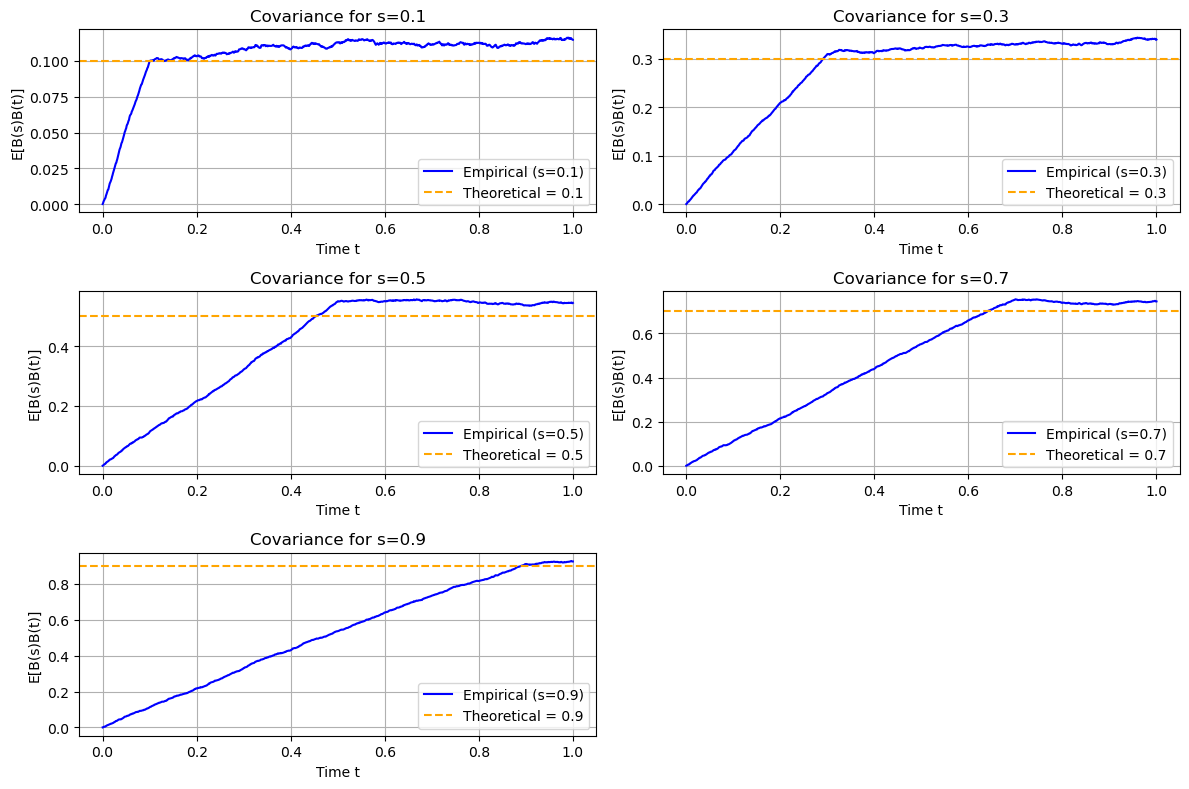

Saved plot to: C:\Users\LENOVO\bm_increments_3d.png


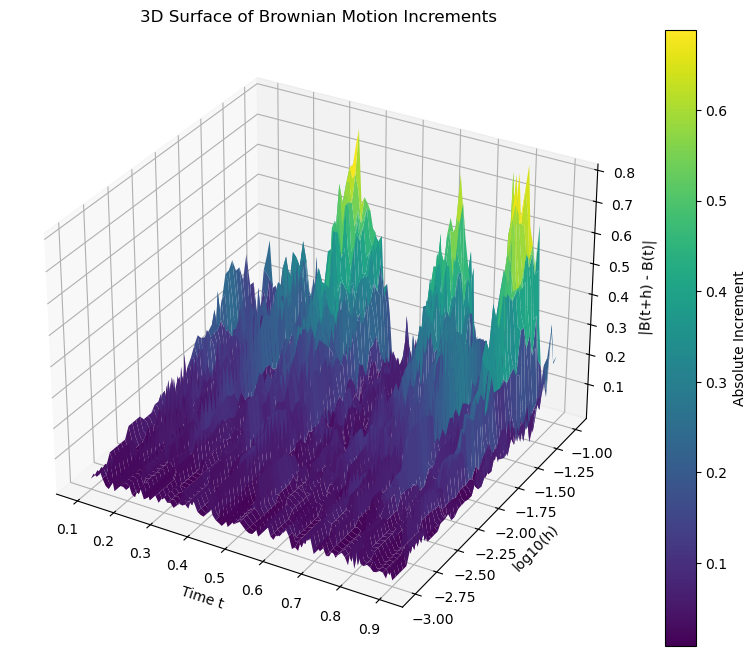

Saved plot to: C:\Users\LENOVO\bm_scaling_variance.png


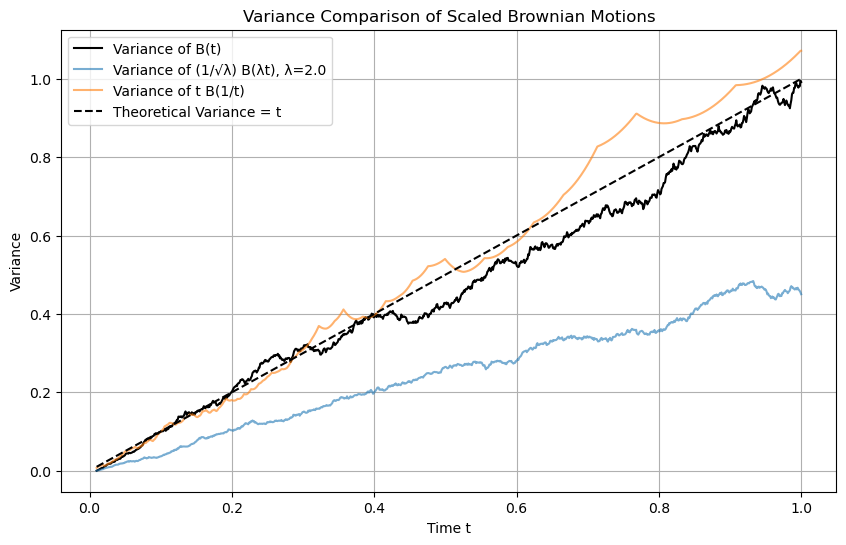

Saved plot to: C:\Users\LENOVO\bm_fbm_quadratic_variation.png


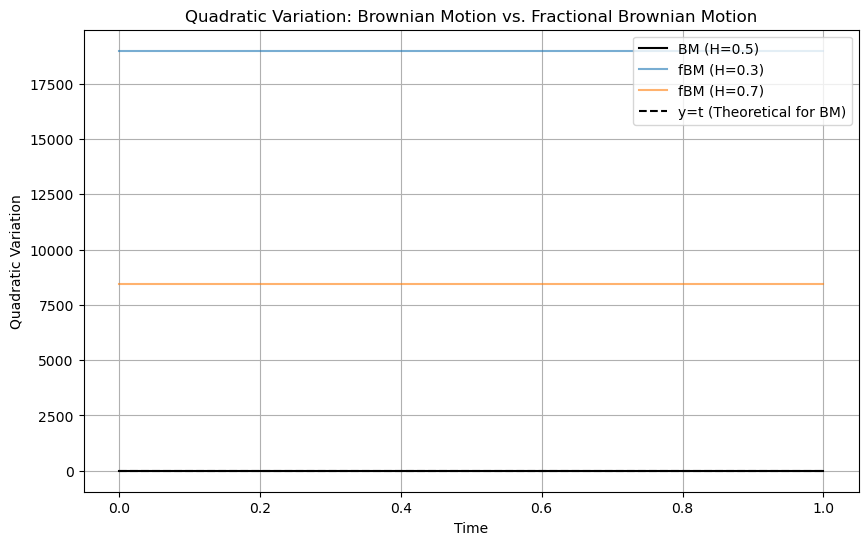

Saved plot to: C:\Users\LENOVO\gbm_volatility_error.png


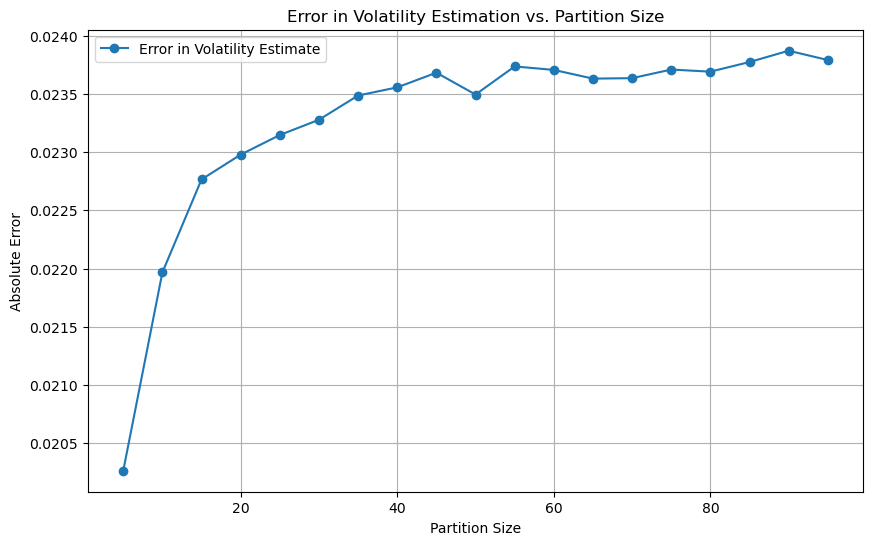

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Set random seed for reproducibility
np.random.seed(42)

# Check current working directory and set save directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")
save_dir = current_dir
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Simulate a Brownian Motion path
def brownian_motion(t_max=1.0, n_steps=1000):
    dt = t_max / n_steps
    time = np.linspace(0, t_max, n_steps + 1)
    increments = np.random.normal(0, np.sqrt(dt), n_steps)
    path = np.cumsum(np.concatenate(([0], increments)))
    return time, path

# Simulate a Fractional Brownian Motion path (using Cholesky decomposition)
def fractional_brownian_motion(t_max=1.0, n_steps=1000, H=0.5):
    time = np.linspace(0, t_max, n_steps + 1)
    n = len(time) - 1
    # Covariance matrix for fBM
    cov = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            ti, tj = time[i+1], time[j+1]
            cov[i, j] = 0.5 * (ti**(2*H) + tj**(2*H) - abs(ti - tj)**(2*H))
    # Cholesky decomposition
    L = np.linalg.cholesky(cov + 1e-10 * np.eye(n))  # Add small diagonal for numerical stability
    increments = L @ np.random.normal(0, 1, n)
    path = np.cumsum(np.concatenate(([0], increments)))
    return time, path

# Quadratic Variation
def quadratic_variation(path, time, partition_size):
    qv = []
    for t in time:
        indices = np.arange(0, len(time), partition_size)
        if indices[-1] != len(time) - 1:
            indices = np.append(indices, len(time) - 1)
        sub_path = path[indices]
        increments = np.diff(sub_path) ** 2
        qv.append(np.sum(increments))
    return np.array(qv)

# 1. Animated Covariance Evolution
n_simulations = 1000
t_max = 1.0
n_steps = 1000
time, _ = brownian_motion(t_max, n_steps)
paths = np.array([brownian_motion(t_max, n_steps)[1] for _ in range(n_simulations)])

s_values = [0.1, 0.3, 0.5, 0.7, 0.9]
plt.figure(figsize=(12, 8))
for i, s in enumerate(s_values):
    plt.subplot(3, 2, i+1)
    s_idx = int(s * n_steps)
    cov_empirical = np.mean(paths[:, s_idx, np.newaxis] * paths, axis=0)
    plt.plot(time, cov_empirical, label=f"Empirical (s={s})", color="blue")
    plt.axhline(s, color="orange", linestyle="--", label=f"Theoretical = {s}")
    plt.title(f"Covariance for s={s}")
    plt.xlabel("Time t")
    plt.ylabel("E[B(s)B(t)]")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
file_path26 = os.path.join(save_dir, "bm_covariance_evolution.png")
plt.savefig(file_path26)
print(f"Saved plot to: {file_path26}")
plt.show()
plt.close()

# 2. 3D Surface of Increments
time, path = brownian_motion(t_max=1.0, n_steps=1000)
h_values = np.logspace(-3, -1, 50)  # Increment sizes
t_values = np.linspace(0.1, 0.9, 100)  # Times to evaluate
increments = np.zeros((len(t_values), len(h_values)))

for i, t in enumerate(t_values):
    idx1 = np.argmin(np.abs(time - t))
    for j, h in enumerate(h_values):
        idx2 = np.argmin(np.abs(time - (t + h)))
        if idx2 < len(path):  # Ensure we don't go out of bounds
            increments[i, j] = np.abs(path[idx2] - path[idx1])

T, H = np.meshgrid(t_values, h_values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, np.log10(H), increments.T, cmap='viridis')
ax.set_xlabel("Time t")
ax.set_ylabel("log10(h)")
ax.set_zlabel("|B(t+h) - B(t)|")
ax.set_title("3D Surface of Brownian Motion Increments")
fig.colorbar(surf, label="Absolute Increment")
file_path27 = os.path.join(save_dir, "bm_increments_3d.png")
plt.savefig(file_path27)
print(f"Saved plot to: {file_path27}")
plt.show()
plt.close()

# 3. Variance Comparison for Scaling Properties
time = np.linspace(0.01, 1.0, 1000)
time_bm, path = brownian_motion(t_max=1.0, n_steps=999)
lambda_val = 2.0
# Scaled process: (1/sqrt(lambda)) B(lambda t)
scaled_path = (1 / np.sqrt(lambda_val)) * path
# Transformed process: t B(1/t)
time_inv = 1 / time
time_inv_max = max(time_inv)
time_inv_grid = np.linspace(0, time_inv_max, 1000)
increments = np.random.normal(0, np.sqrt(time_inv_max / 999), 999)
path_inv = np.cumsum(np.concatenate(([0], increments)))
path_inv_interp = np.interp(time_inv, time_inv_grid, path_inv)
path_transformed = time * path_inv_interp

# Compute variances
n_simulations = 100
var_bm = np.var(np.array([brownian_motion(t_max=1.0, n_steps=999)[1] for _ in range(n_simulations)]), axis=0)
var_scaled = np.var(np.array([(1 / np.sqrt(lambda_val)) * brownian_motion(t_max=1.0, n_steps=999)[1] for _ in range(n_simulations)]), axis=0)
var_transformed = np.var(np.array([time * np.interp(1/time, time_inv_grid, brownian_motion(t_max=time_inv_max, n_steps=999)[1]) for _ in range(n_simulations)]), axis=0)

plt.figure(figsize=(10, 6))
plt.plot(time, var_bm, label="Variance of B(t)", color="black")
plt.plot(time, var_scaled, label=f"Variance of (1/√λ) B(λt), λ={lambda_val}", alpha=0.6)
plt.plot(time, var_transformed, label="Variance of t B(1/t)", alpha=0.6)
plt.plot(time, time, "k--", label="Theoretical Variance = t")
plt.title("Variance Comparison of Scaled Brownian Motions")
plt.xlabel("Time t")
plt.ylabel("Variance")
plt.grid(True)
plt.legend()
file_path28 = os.path.join(save_dir, "bm_scaling_variance.png")
plt.savefig(file_path28)
print(f"Saved plot to: {file_path28}")
plt.show()
plt.close()

# 4. Quadratic Variation Comparison with Fractional Brownian Motion
time, bm_path = brownian_motion(t_max=1.0, n_steps=1000)
time, fbm_path_h03 = fractional_brownian_motion(t_max=1.0, n_steps=1000, H=0.3)
time, fbm_path_h07 = fractional_brownian_motion(t_max=1.0, n_steps=1000, H=0.7)

partition_size = 10
plt.figure(figsize=(10, 6))
qv_bm = quadratic_variation(bm_path, time, partition_size)
qv_fbm_h03 = quadratic_variation(fbm_path_h03, time, partition_size)
qv_fbm_h07 = quadratic_variation(fbm_path_h07, time, partition_size)

plt.plot(time[::partition_size], qv_bm[::partition_size], label="BM (H=0.5)", color="black")
plt.plot(time[::partition_size], qv_fbm_h03[::partition_size], label="fBM (H=0.3)", alpha=0.6)
plt.plot(time[::partition_size], qv_fbm_h07[::partition_size], label="fBM (H=0.7)", alpha=0.6)
plt.plot(time, time, "k--", label="y=t (Theoretical for BM)")
plt.title("Quadratic Variation: Brownian Motion vs. Fractional Brownian Motion")
plt.xlabel("Time")
plt.ylabel("Quadratic Variation")
plt.grid(True)
plt.legend()
file_path29 = os.path.join(save_dir, "bm_fbm_quadratic_variation.png")
plt.savefig(file_path29)
print(f"Saved plot to: {file_path29}")
plt.show()
plt.close()

# 5. Volatility Estimation Error
S0 = 100
sigma = 0.2
alpha = 0.05
t_max = 1.0
n_steps = 1000
time, bm_path = brownian_motion(t_max, n_steps)
S = S0 * np.exp(sigma * bm_path + (alpha - sigma**2 / 2) * time)

T1, T2 = 0.2, 0.8
idx1, idx2 = np.argmin(np.abs(time - T1)), np.argmin(np.abs(time - T2))
sub_time = time[idx1:idx2+1]
sub_S = S[idx1:idx2+1]
log_returns = np.diff(np.log(sub_S))
partition_sizes = np.arange(5, 100, 5)
errors = []

theoretical_vol = sigma**2 * (T2 - T1)
for ps in partition_sizes:
    indices = np.arange(0, len(log_returns), ps)
    if indices[-1] != len(log_returns) - 1:
        indices = np.append(indices, len(log_returns) - 1)
    realized_vol = np.sum((log_returns[indices[:-1]])**2)
    errors.append(np.abs(realized_vol - theoretical_vol))

plt.figure(figsize=(10, 6))
plt.plot(partition_sizes, errors, marker="o", label="Error in Volatility Estimate")
plt.title("Error in Volatility Estimation vs. Partition Size")
plt.xlabel("Partition Size")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.legend()
file_path30 = os.path.join(save_dir, "gbm_volatility_error.png")
plt.savefig(file_path30)
print(f"Saved plot to: {file_path30}")
plt.show()
plt.close()